# Capstone Project - Life Insurance Sales

## Problem Statement: Life Insurance Data
The dataset belongs to a leading life insurance company. The company wants to predict the bonus for its agents so that it may design appropriate engagement activity for their high performing agents and upskill programs for low performing agents

In [ ]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

## Reading the data and performing exploratory data analysis:

In [2]:
# loading the data
df = pd.read_excel("Sales.xlsx", sheet_name = 'Sales')

# checking the data has been imported correctly or not - first 
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [3]:
# checking the last few rows of the data
df.tail()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
4515,7004515,3953,4.0,8.0,Agent,Small Business,Graduate,Male,4,Senior Manager,2.0,Single,26355.0,0,2.0,636473.0,West,Yearly,9,1.0
4516,7004516,2939,9.0,9.0,Agent,Salaried,Under Graduate,Female,2,Executive,2.0,Married,20991.0,0,3.0,296813.0,North,Yearly,1,3.0
4517,7004517,3792,23.0,23.0,Agent,Salaried,Engineer,Female,5,AVP,5.0,Single,NaN,0,2.0,667371.0,North,Half Yearly,4,1.0
4518,7004518,4816,10.0,10.0,Online,Small Business,Graduate,Female,4,Executive,2.0,Single,20068.0,0,6.0,943999.0,West,Half Yearly,1,5.0
4519,7004519,4764,14.0,10.0,Agent,Salaried,Under Graduate,Female,5,Manager,2.0,Married,23820.0,0,3.0,700308.0,North,Half Yearly,1,3.0


In [4]:
# Dropping the unnecessary columns

df= df.drop(["CustID"], axis=1)
df.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


#### "CustID" column has been dropped as it contains all unique values and hence not relevant in predicting agent bonus.

### About Data:

In [5]:
# checking shape of the data

df.shape

(4520, 19)

##### There are 4520 rows and 19 columns present in our data:

In [6]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   int64  
 1   Age                   4251 non-null   float64
 2   CustTenure            4294 non-null   float64
 3   Channel               4520 non-null   object 
 4   Occupation            4520 non-null   object 
 5   EducationField        4520 non-null   object 
 6   Gender                4520 non-null   object 
 7   ExistingProdType      4520 non-null   int64  
 8   Designation           4520 non-null   object 
 9   NumberOfPolicy        4475 non-null   float64
 10  MaritalStatus         4520 non-null   object 
 11  MonthlyIncome         4284 non-null   float64
 12  Complaint             4520 non-null   int64  
 13  ExistingPolicyTenure  4336 non-null   float64
 14  SumAssured            4366 non-null   float64
 15  Zone                 

In [7]:
# count of data type

df.dtypes.value_counts()

object     8
float64    7
int64      4
dtype: int64

##### The dataset now contains 4520 rows and 19 columns. Out of 19 columns, 8 are of object type, 7 are of float type and 4 are of integer type.

### Checking duplicate values:

In [8]:
# checking duplicate values

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(4520, 19)


##### No duplicate rows present in our data.

### Description of the data:

In [9]:
# describing the data

df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AgentBonus,4520.0,NaN,NaN,NaN,4077.838274,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,NaN,NaN,NaN,14.494707,9.037629,2.0,7.0,13.0,20.0,58.0
CustTenure,4294.0,NaN,NaN,NaN,14.469027,8.963671,2.0,7.0,13.0,20.0,57.0
Channel,4520,3,Agent,3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,4520,5,Salaried,2192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationField,4520,7,Graduate,1870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4520,3,Male,2688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExistingProdType,4520.0,NaN,NaN,NaN,3.688938,1.015769,1.0,3.0,4.0,4.0,6.0
Designation,4520,6,Manager,1620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPolicy,4475.0,NaN,NaN,NaN,3.565363,1.455926,1.0,2.0,4.0,5.0,6.0


### Unique Values:

In [10]:
# unique values for categorical columns
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CHANNEL :  3
Online                  468
Third Party Partner     858
Agent                  3194
Name: Channel, dtype: int64


OCCUPATION :  5
Free Lancer           2
Laarge Business     153
Large Business      255
Small Business     1918
Salaried           2192
Name: Occupation, dtype: int64


EDUCATIONFIELD :  7
MBA                 74
UG                 230
Post Graduate      252
Engineer           408
Diploma            496
Under Graduate    1190
Graduate          1870
Name: EducationField, dtype: int64


GENDER :  3
Fe male     325
Female     1507
Male       2688
Name: Gender, dtype: int64


DESIGNATION :  6
Exe                127
VP                 226
AVP                336
Senior Manager     676
Executive         1535
Manager           1620
Name: Designation, dtype: int64


MARITALSTATUS :  4
Unmarried     194
Divorced      804
Single       1254
Married      2268
Name: MaritalStatus, dtype: int64


ZONE :  4
South       6
East       64
North    1884
West     2566
Name: Zone, dty

##### We can see the unique sub-categories of the columns, few of the sub-categories are misspelled or grouped partially therefore we will group and correct the incorrect sub-categories with the correct ones.

In [11]:
# Occupation: 'Laarge Business' replaced with 'Large Business'
df.Occupation.replace(to_replace='Laarge Business',value='Large Business',inplace=True)

# EducationField: 'UG' replaced with 'Under Graduate'
df.EducationField.replace(to_replace='UG',value='Under Graduate',inplace=True)
df.EducationField.replace(to_replace='Graduate',value='Post Graduate',inplace=True)
df.EducationField.replace(to_replace='MBA',value='Post Graduate',inplace=True)

# Gender: 'Fe male' replaced with 'Female'
df.Gender.replace(to_replace='Fe male',value='Female',inplace=True)

# Designation: 'Exe' replaced with 'Executive'
df.Designation.replace(to_replace='Exe',value='Executive',inplace=True)

# MaritalStatus: 'Single' replaced with 'Unmarried'
df.MaritalStatus.replace(to_replace='Single',value='Unmarried',inplace=True)

##### Renaming and Correction: 
- ‘Laarge’ and ‘Large’ Business are put under the same category as it clearly depicts the spelling mistake.
- The same for ‘UG’ and ‘Under Graduate’ becuase UG is short form for under graduation.
- ‘Graduate’ and 'MBA' are put under ‘Post Graduate’ category.
- ‘Fe male’ replaced with ‘Female’ ,and ‘Exe’ with ‘Executive’.
- We have not put 'Engineer' in any category because an engineer could be under graduated or post graduated, Hence placing 'Engineer' in any category can alter our predictions.

In [12]:
# unique values for categorical columns
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CHANNEL :  3
Online                  468
Third Party Partner     858
Agent                  3194
Name: Channel, dtype: int64


OCCUPATION :  4
Free Lancer          2
Large Business     408
Small Business    1918
Salaried          2192
Name: Occupation, dtype: int64


EDUCATIONFIELD :  4
Engineer           408
Diploma            496
Under Graduate    1420
Post Graduate     2196
Name: EducationField, dtype: int64


GENDER :  2
Female    1832
Male      2688
Name: Gender, dtype: int64


DESIGNATION :  5
VP                 226
AVP                336
Senior Manager     676
Manager           1620
Executive         1662
Name: Designation, dtype: int64


MARITALSTATUS :  3
Divorced      804
Unmarried    1448
Married      2268
Name: MaritalStatus, dtype: int64


ZONE :  4
South       6
East       64
North    1884
West     2566
Name: Zone, dtype: int64


PAYMENTMETHOD :  4
Quarterly        76
Monthly         354
Yearly         1434
Half Yearly    2656
Name: PaymentMethod, dtype: int64




##### We can observe all the incorrect or irregular naming and grouping are now replaced with correct ones.

### Checking Null values:

In [13]:
# checking null values
df.isnull().sum()

AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

##### Null values are present in our data, Null values can effect the predictions in further analysis therefore null values will be imputed by mean and mode as per columns requirement.

In [14]:
# filling up the missing values

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean())
df['CustTenure'] = df['CustTenure'].fillna(df['CustTenure'].mean())
df['ExistingPolicyTenure'] = df['ExistingPolicyTenure'].fillna(df['ExistingPolicyTenure'].mean())
df['SumAssured'] = df['SumAssured'].fillna(df['SumAssured'].mean())
df['CustCareScore'] = df['CustCareScore'].fillna(df['CustCareScore'].mode()[0])
df['NumberOfPolicy'] = df['NumberOfPolicy'].fillna(df['NumberOfPolicy'].mode()[0])

df.isnull().sum()

AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

##### Existing null values have been imputed with mean and mode, Hence no null values are present in our data.

### Outliers Checking and Treatment:

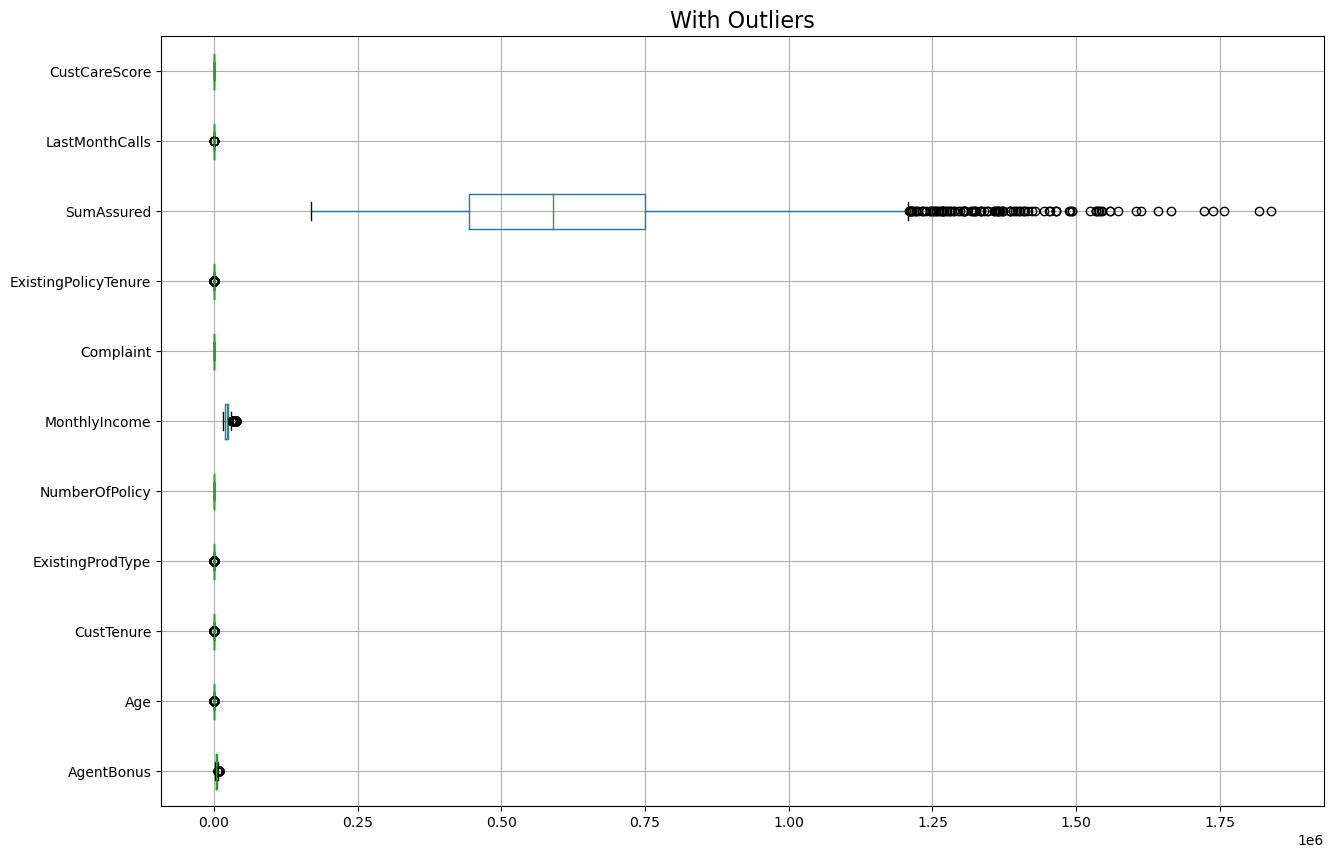

In [15]:
# construct box plot for continuous variables

cont =df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

##### A lot of outliers are present in our data so we will be removing outliers from the stats point of view, but business domain understanding might require different treatment.

In [16]:
# removing outliers

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5*IQR)
    upper_range= Q3+(1.5*IQR)
    return lower_range, upper_range

In [17]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column] > ur,ur,df[column])
    df[column]=np.where(df[column] < lr,lr,df[column])

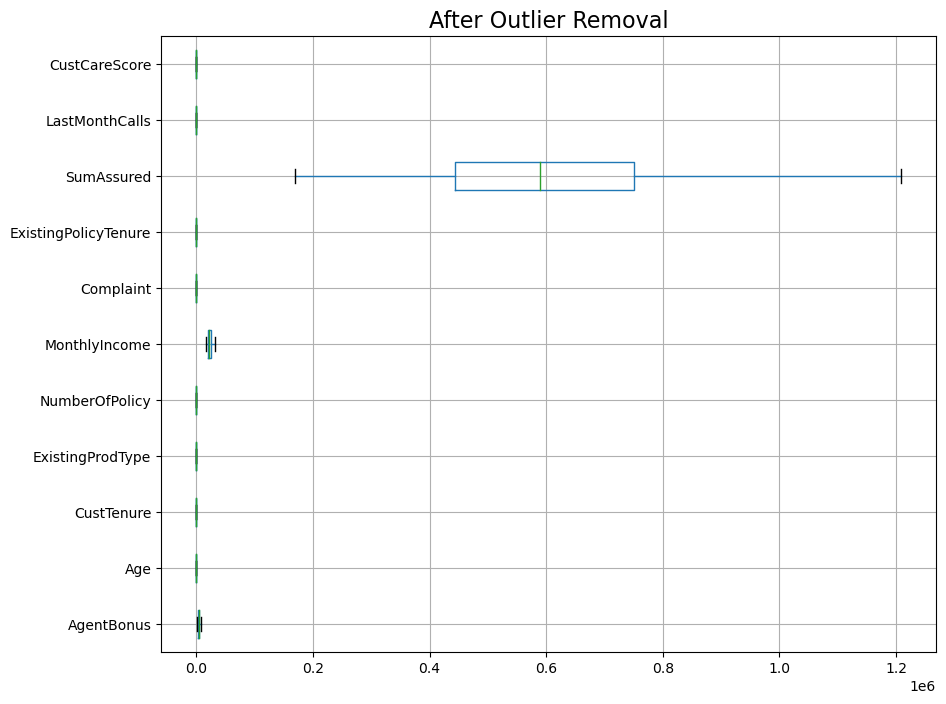

In [18]:
plt.figure(figsize=(10,8))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

##### Outliers have been treated.

### Converting the necessary variables to object as it is meant to be. Because these variables have values that are numeric but are a categorical column.

In [19]:
df[['ExistingProdType', 'NumberOfPolicy', 'Complaint', 'CustCareScore']] = df[['ExistingProdType', 'NumberOfPolicy', 'Complaint', 'CustCareScore']].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   float64
 1   Age                   4520 non-null   float64
 2   CustTenure            4520 non-null   float64
 3   Channel               4520 non-null   object 
 4   Occupation            4520 non-null   object 
 5   EducationField        4520 non-null   object 
 6   Gender                4520 non-null   object 
 7   ExistingProdType      4520 non-null   object 
 8   Designation           4520 non-null   object 
 9   NumberOfPolicy        4520 non-null   object 
 10  MaritalStatus         4520 non-null   object 
 11  MonthlyIncome         4520 non-null   float64
 12  Complaint             4520 non-null   object 
 13  ExistingPolicyTenure  4520 non-null   float64
 14  SumAssured            4520 non-null   float64
 15  Zone                 

##### We can observe that the 'ExistingProdType', 'NumberOfPolicy', 'Complaint', 'CustCareScore' columns are now of object type.

## Univariate Analysis:

### Continuous Variables:

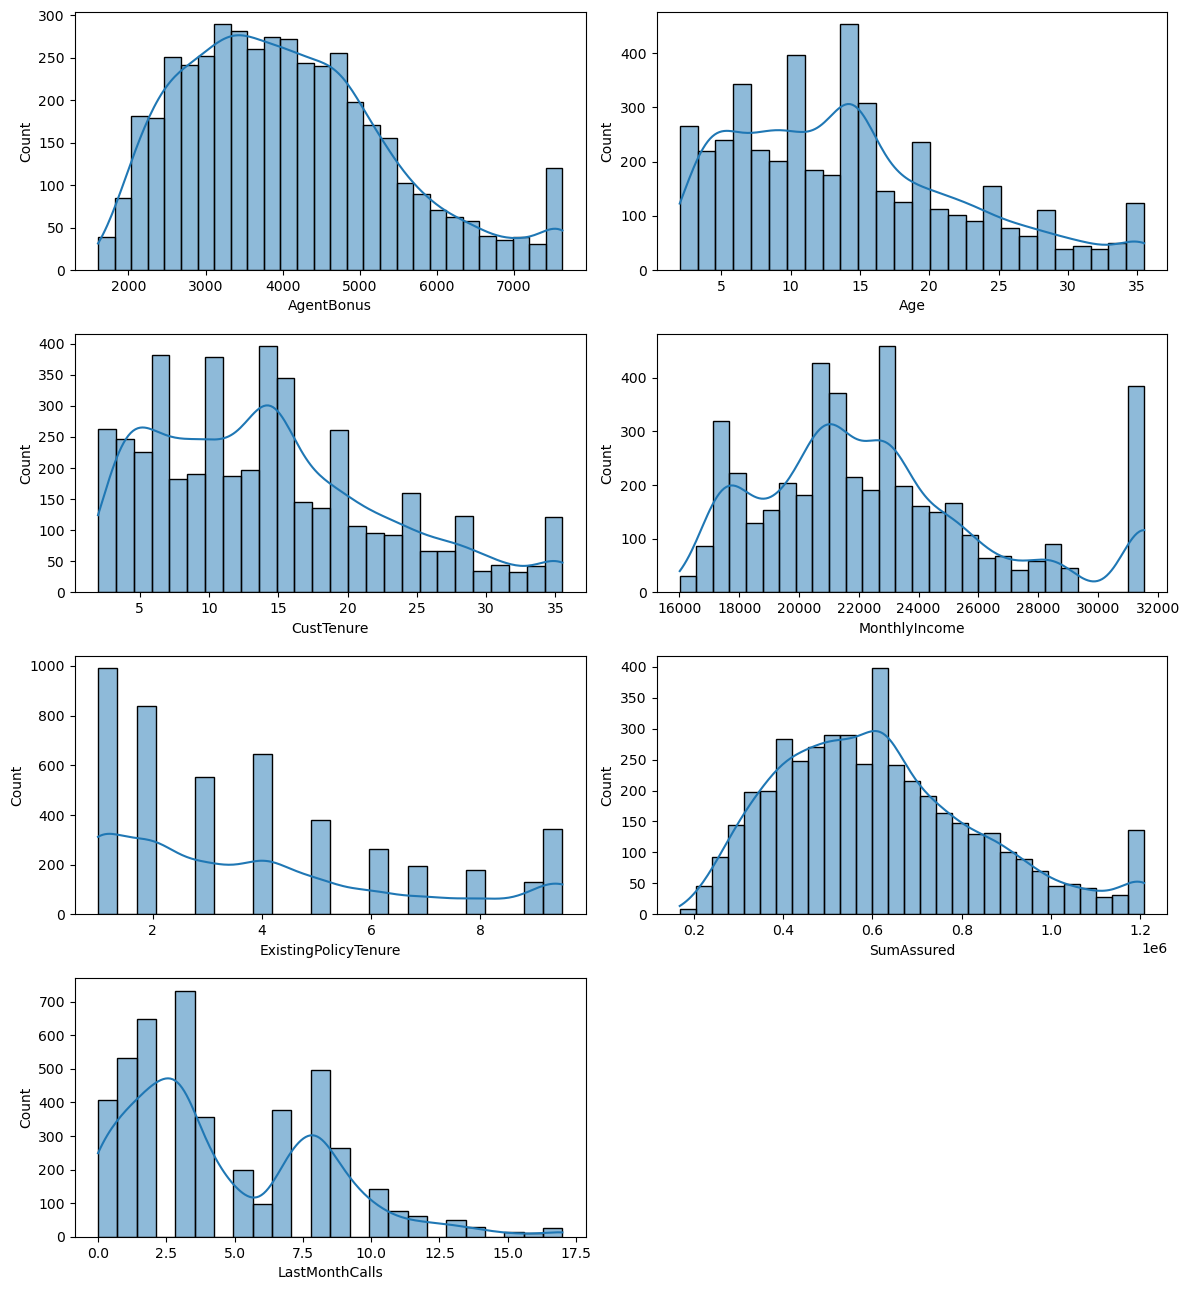

In [20]:
# creating a list for all the continuous columns
cont_list = df.select_dtypes(include = ['int64','float64']).columns

fig_dims = (12, 13) 
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=fig_dims)
for i in range(len(cont_list)):
    sns.histplot(x = df[cont_list[i]], data = df, kde=True, ax=axs[i // 2, i % 2])
    plt.tight_layout()
fig.delaxes(ax= axs[3][1])

### Continuous Variables Analysis:

1.	Agent Bonus: The majority of agent bonuses fall between ₹3000 and ₹5000, indicating a central tendency with few outliers on either end.
2.	Customer Age: The customer base skews young, with most customers falling between 10 and 20 years old.
3.	Customer Tenure: Most customers have been with the company for 6 to 20 years, suggesting a loyal customer base.
4.	Customer Income: The majority of customers earn on an average ₹21,000 per month, with some earning up to ₹32,500. This suggests a diverse income range within the customer base.
5.	Existing Policy Tenure: Tenure in all existing policies of a customers varies from 1 to around 10.
6.	Sum Assured: The average sum assured is ₹6,18,833, with a range of ₹1,68,536 to ₹12,00,000. This indicates varying levels of insurance coverage chosen by customers.
7.	Customer Calls: The average customer calls the company 4.62 times per month, with the maximum number of calls being 17. This suggests moderate customer engagement, with some requiring more support.


### Categorical Variables:

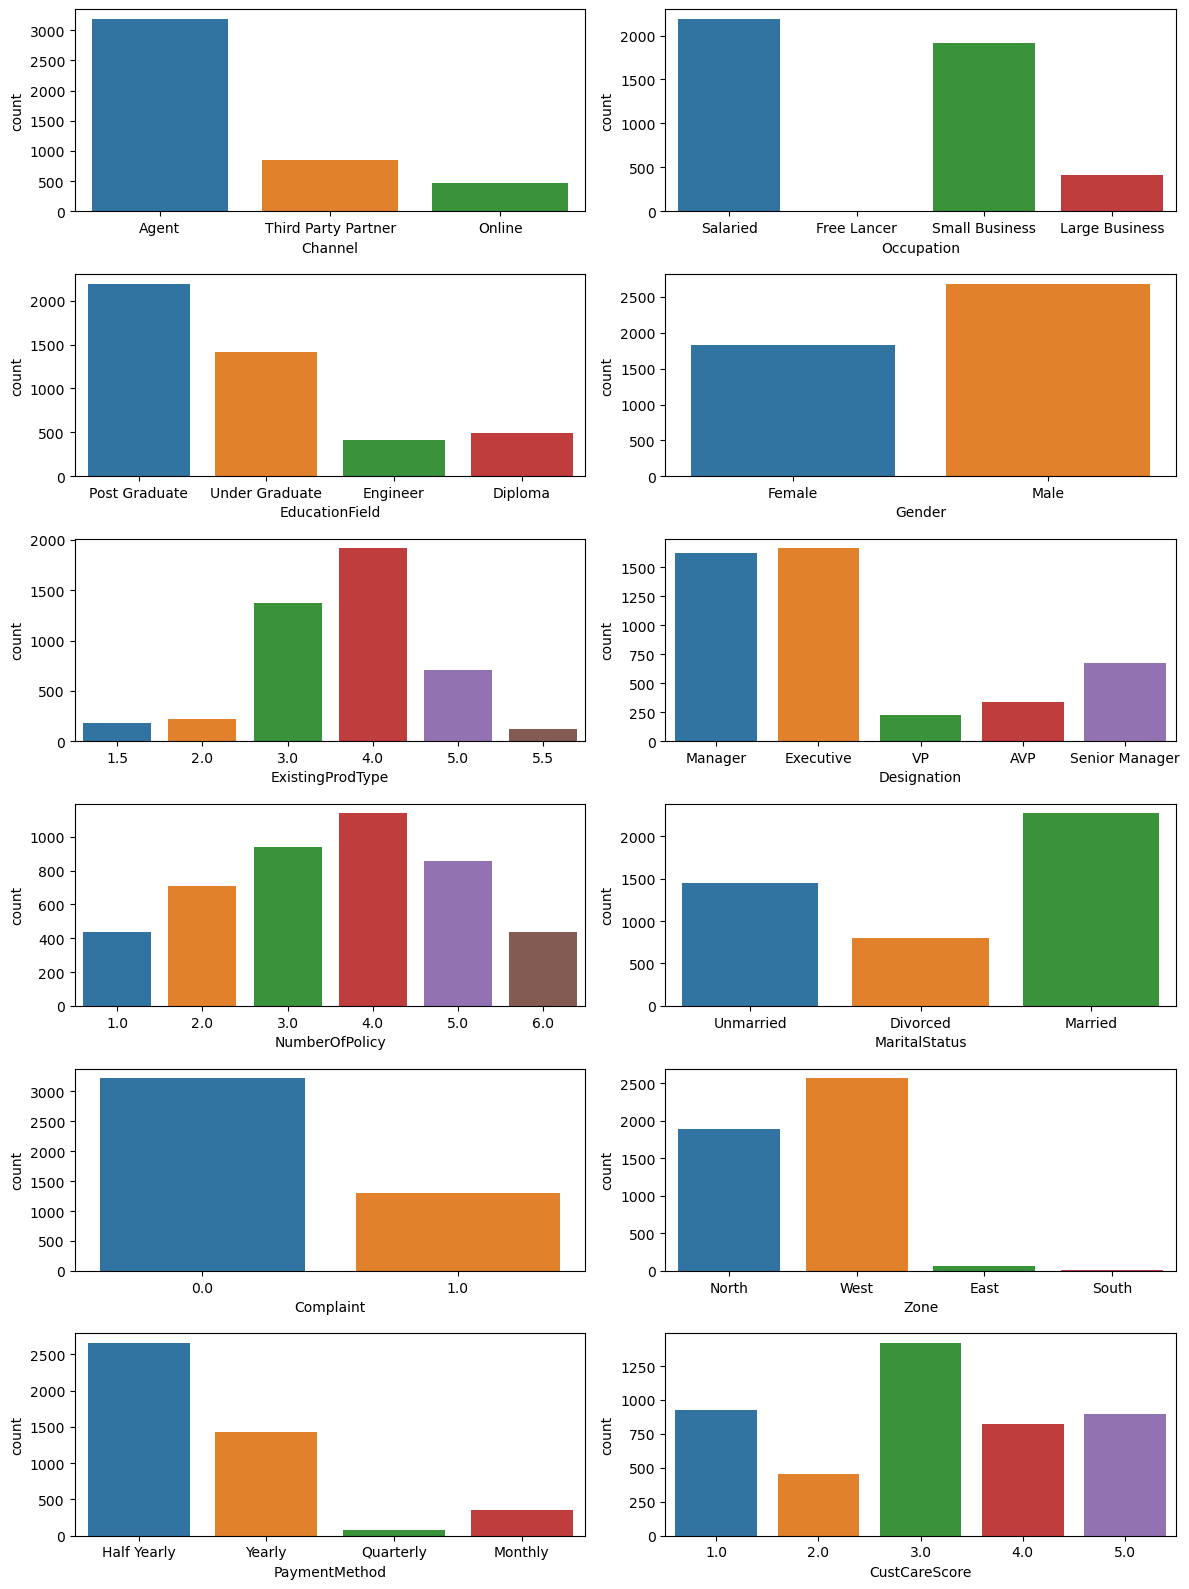

In [21]:
# creating a list for all the categorical columns
cat_list = df.select_dtypes(include = ['object']).columns

fig_dims = (12, 16) 
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=fig_dims)
for i in range(len(cat_list)):
    sns.countplot(x = df[cat_list[i]], data = df, ax=axs[i // 2, i % 2])
    plt.tight_layout()

###  Categorical :
Sales Channels:
1.	Agents are the primary sales channel, dominating other methods.
Customer Demographics:
2.	With only 2 freelancers out of 4520 customers, most buyers are employed or business owners.
3.	81% are undergrads, suggesting early life insurance adoption.
4.	Diploma holders have the lowest insurance purchase rate.
5.	The customer base is nearly balanced with 59% male and 41% female.
6.	51% are married, 17% divorced, and 32% unmarried.
Insurance Products:
7.	Type 4 is the most popular policy, but Type 3 has the highest average sum assured despite fewer sales. Type 2 policies are the most expensive with only 442 holders.
Customer Satisfaction:
8.	Managers and executives purchase more insurance than VPs and AVPs.
9.	78% are satisfied with service, giving an average agent rating of 3 (out of 5?).
Geographic Distribution:
10.	The West zone holds over 50% of customers (2566/4520), followed by South with only 6.
Payment Methods:
11. Most payments are semi-annual (58.76%), followed by annual (31.73%), monthly (7.83%), and quarterly (1.68%).


## Bivariate Analysis:

### Channel and AgentBonus:

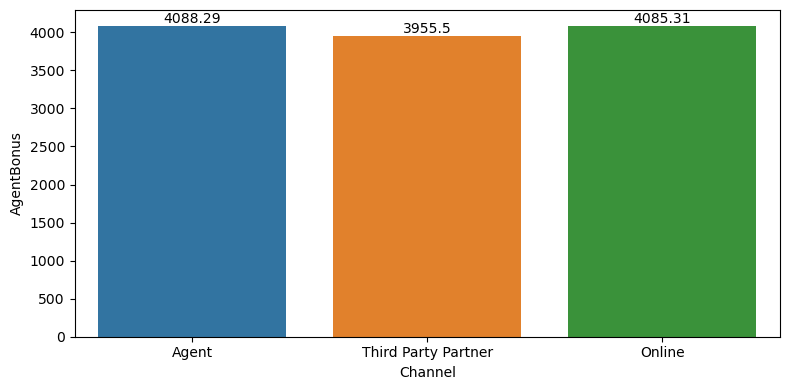

In [22]:
plt.figure(figsize = (8,4))
a=sns.barplot(data = df, x = 'Channel', y = 'AgentBonus', ci = None )
for label in a.containers:
    a.bar_label(label)
    plt.tight_layout()
plt.show()

- The graph shows the agent bonus for each channel, with the agent channel having the highest average bonus at ₹4088, followed by the online channel at ₹4085, and the third party partner channel at ₹3955.
- This means maximum aquisition of customers for a company are done by Agents therefore resulting in maximum bonus followed by online channels.


### Occupation and AgentBonus:

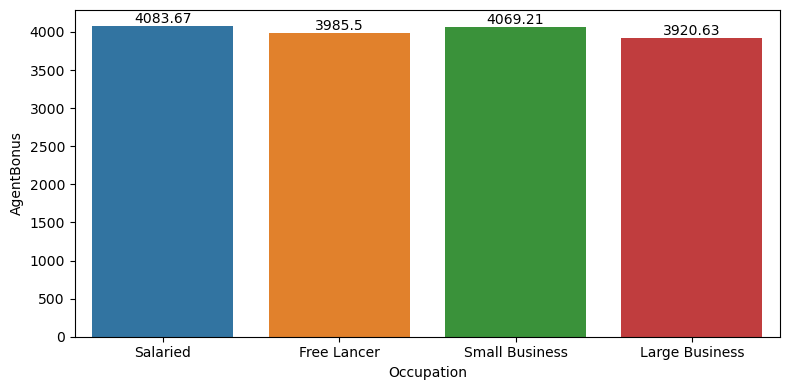

In [23]:
plt.figure(figsize = (8,4))
a=sns.barplot(data = df, x = 'Occupation', y = 'AgentBonus', ci = None )
for label in a.containers:
    a.bar_label(label)
    plt.tight_layout()
plt.show()

- The agent bonus appears to be higher for small business customers than for large business customers.
- The agent bonus appears to be lowest for Freelancer and Large Business customers.
- Maximum bonus is made by through the salaried people followed by small business owners.

### Gender and AgentBonus:

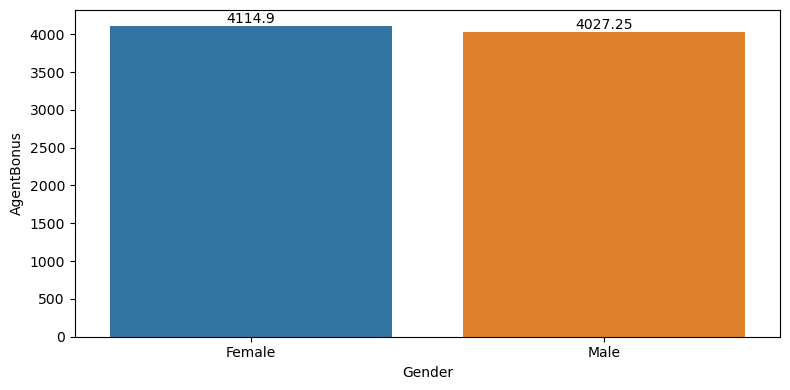

In [24]:
plt.figure(figsize = (8,4))
a=sns.barplot(data = df, x = 'Gender', y = 'AgentBonus', ci = None )
for label in a.containers:
    a.bar_label(label)
    plt.tight_layout()
plt.show()

- Agent bonus is more for the females although the females are less than the males.
- The agents should look for more female customers as they the bonus percentage is more in females.

### Designation and AgentBonus:

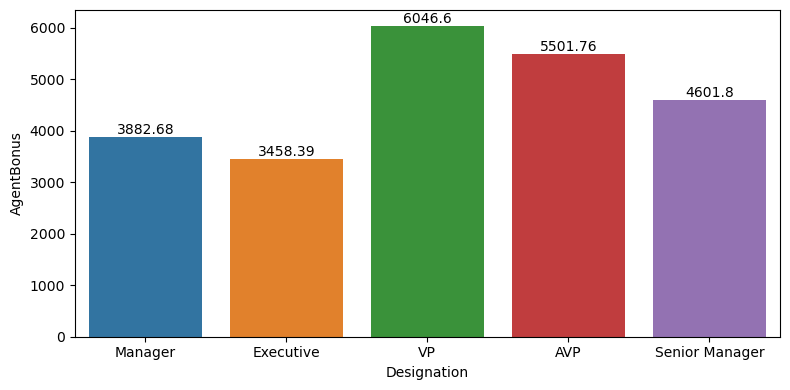

In [25]:
plt.figure(figsize = (8,4))
a=sns.barplot(data = df, x = 'Designation', y = 'AgentBonus', ci = None )
for label in a.containers:
    a.bar_label(label)
    plt.tight_layout()
plt.show()

- Agent bonus tends to be on a higher side when customers are on a higher position in their organization
- Customers on Executive position tends to buy less policies which automatically reduces the number of sales resulting in lowest agent bonus.
- Agent bonus is maximum when customers are Vice President in their organization followed by assistant vice president.

### MaritalStatus and AgentBonus:

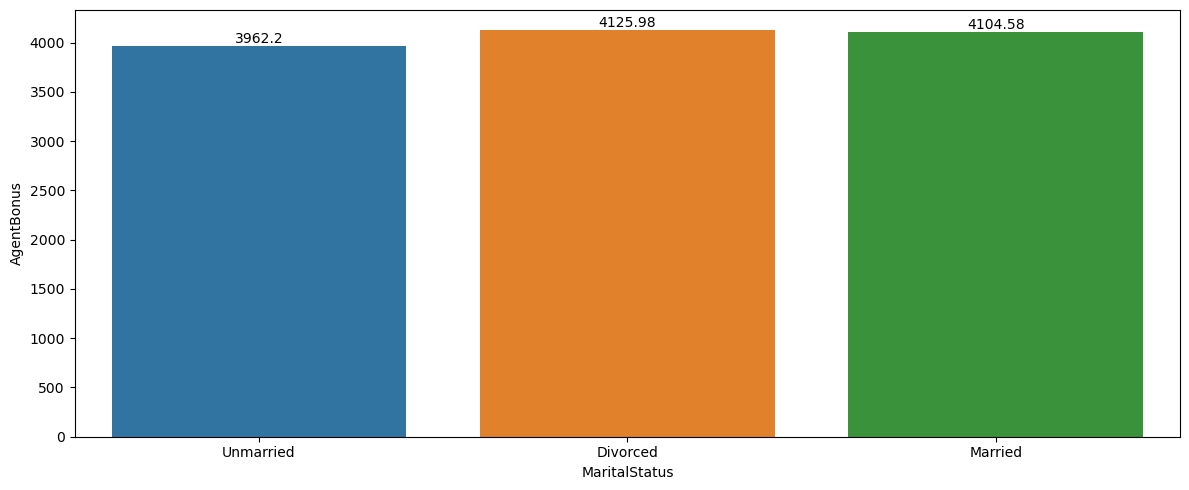

In [26]:
plt.figure(figsize = (12,5))
a=sns.barplot(data = df, x = 'MaritalStatus', y = 'AgentBonus',ci = None )
for label in a.containers:
    a.bar_label(label)
    plt.tight_layout()
plt.show()

- Unmarried people seems to buy less policies which results in less sales and hence low agent bonus.
- Divorced people purchase maximum number of policies which leads to maximum agent bonus followed by married people. 
- Divorced and Married people are the best customers that should be targeted to increase number of policy sales which will also provide a good amount of agent bonus

### Zone and AgentBonus:

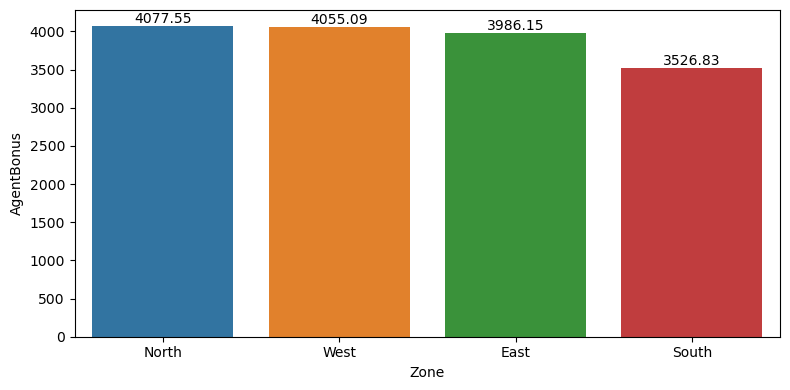

In [27]:
plt.figure(figsize = (8,4))
a=sns.barplot(data = df, x = 'Zone', y = 'AgentBonus', ci = None )
for label in a.containers:
    a.bar_label(label)
    plt.tight_layout()
plt.show()

- North and West are optimum zones for sales of policies because the bonus for agents are maximum followed by the East.
- South Zone is the least active as sales from this zone are minimal and hence the bonus for agents are low.

### PaymentMethod and AgentBonus:

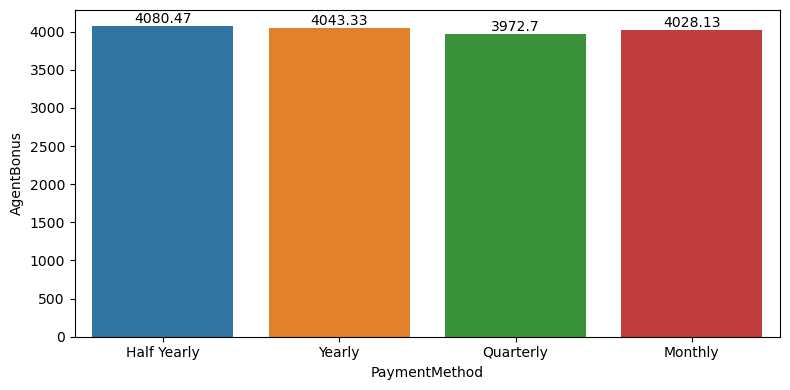

In [28]:
plt.figure(figsize = (8,4))
a=sns.barplot(data = df, x = 'PaymentMethod', y = 'AgentBonus', ci = None )
for label in a.containers:
    a.bar_label(label)
    plt.tight_layout()
plt.show()

- Agent Bonus tends to remain almost similar during half yearly, yearly and monthly. Agent bonus is maximum during the half yearly payments.
- Customers do not prefer quarterly payment as much as they prefer half yearly therefore the bonuses during quarters are less.

### Complaint and AgentBonus:

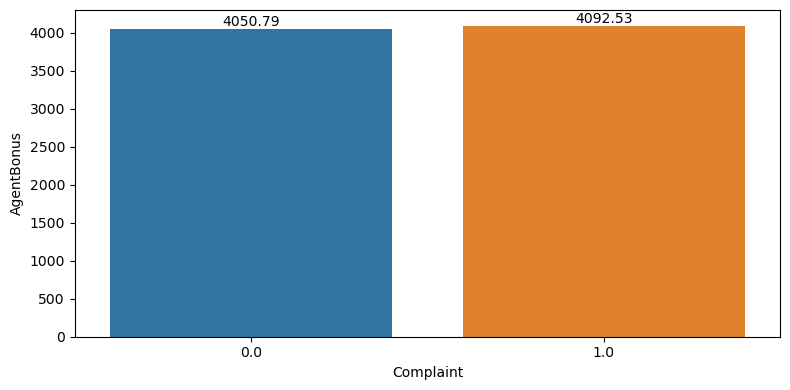

In [29]:
plt.figure(figsize = (8,4))
a=sns.barplot(data = df, x = 'Complaint', y = 'AgentBonus', ci = None )
for label in a.containers:
    a.bar_label(label)
    plt.tight_layout()
plt.show()

- Agent bonus are almost similar during complaints registered by customers , this means bonus are not much affected whether a complaint has been registered or not.

### CustCareScore and AgentBonus:

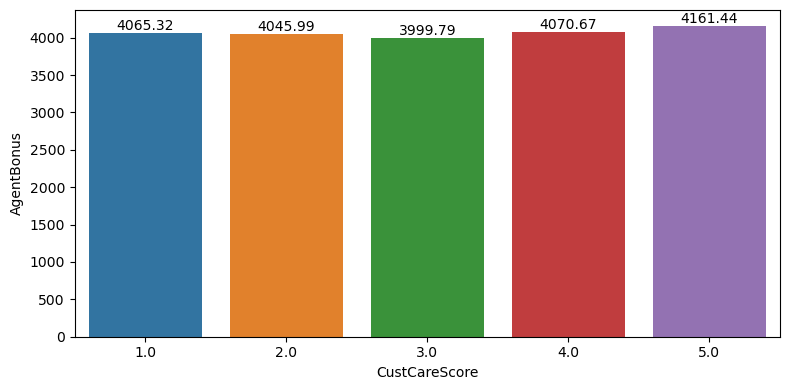

In [30]:
plt.figure(figsize = (8,4))
a=sns.barplot(data = df, x = 'CustCareScore', y = 'AgentBonus', ci = None )
for label in a.containers:
    a.bar_label(label)
    plt.tight_layout()
plt.show()

- Agent Bonus do not vary much between the customer care score, for a lower customer care score i.e 1, we see a good amount of bonus and that too higher than the average customer care score.
- Agent Bonus tends to be maximum when the customer care is high i.e. 4 and 5, meanwhile the agent bonus is lowest when the customer care score is 3.

### NumberOfPolicy and AgentBonus:

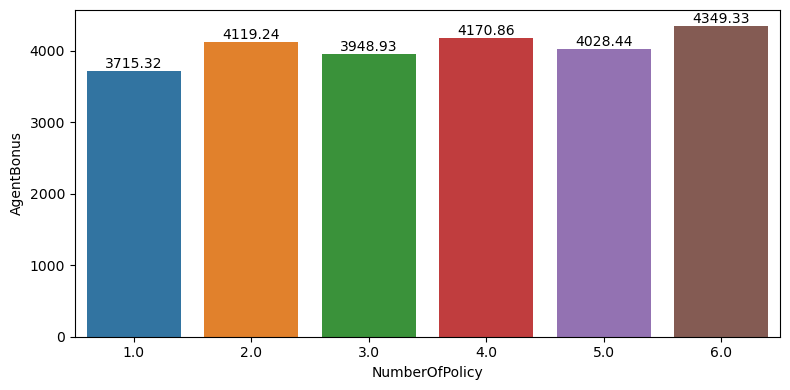

In [31]:
plt.figure(figsize = (8,4))
a=sns.barplot(data = df, x = 'NumberOfPolicy', y = 'AgentBonus', ci = None )
for label in a.containers:
    a.bar_label(label)
    plt.tight_layout()
plt.show()

- Good amount of agent bonus is made when the people possess 6 policies followed by 4 policies.
- Agent Bonus tends to be lowest when people possess only 1 policy and maximum when policies possessed by customer is 6.

### ExistingProdType and AgentBonus:

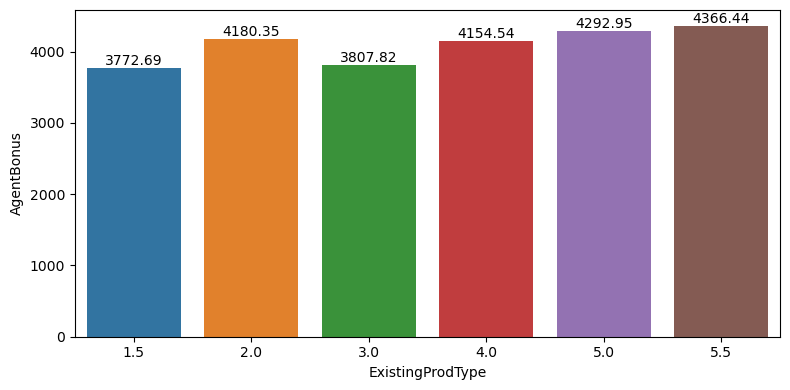

In [32]:
plt.figure(figsize = (8,4))
a=sns.barplot(data = df, x = 'ExistingProdType', y = 'AgentBonus', ci = None )
for label in a.containers:
    a.bar_label(label)
    plt.tight_layout()
plt.show()

- From the above plot, we can see that the maximum bonus payout is for the type 6 policy holders. So we might say that agents who deal with the people who already have type 6 insurance will be given more bonuses followed by type 2 and then type 3 insurance.

## Multivariate Analysis:

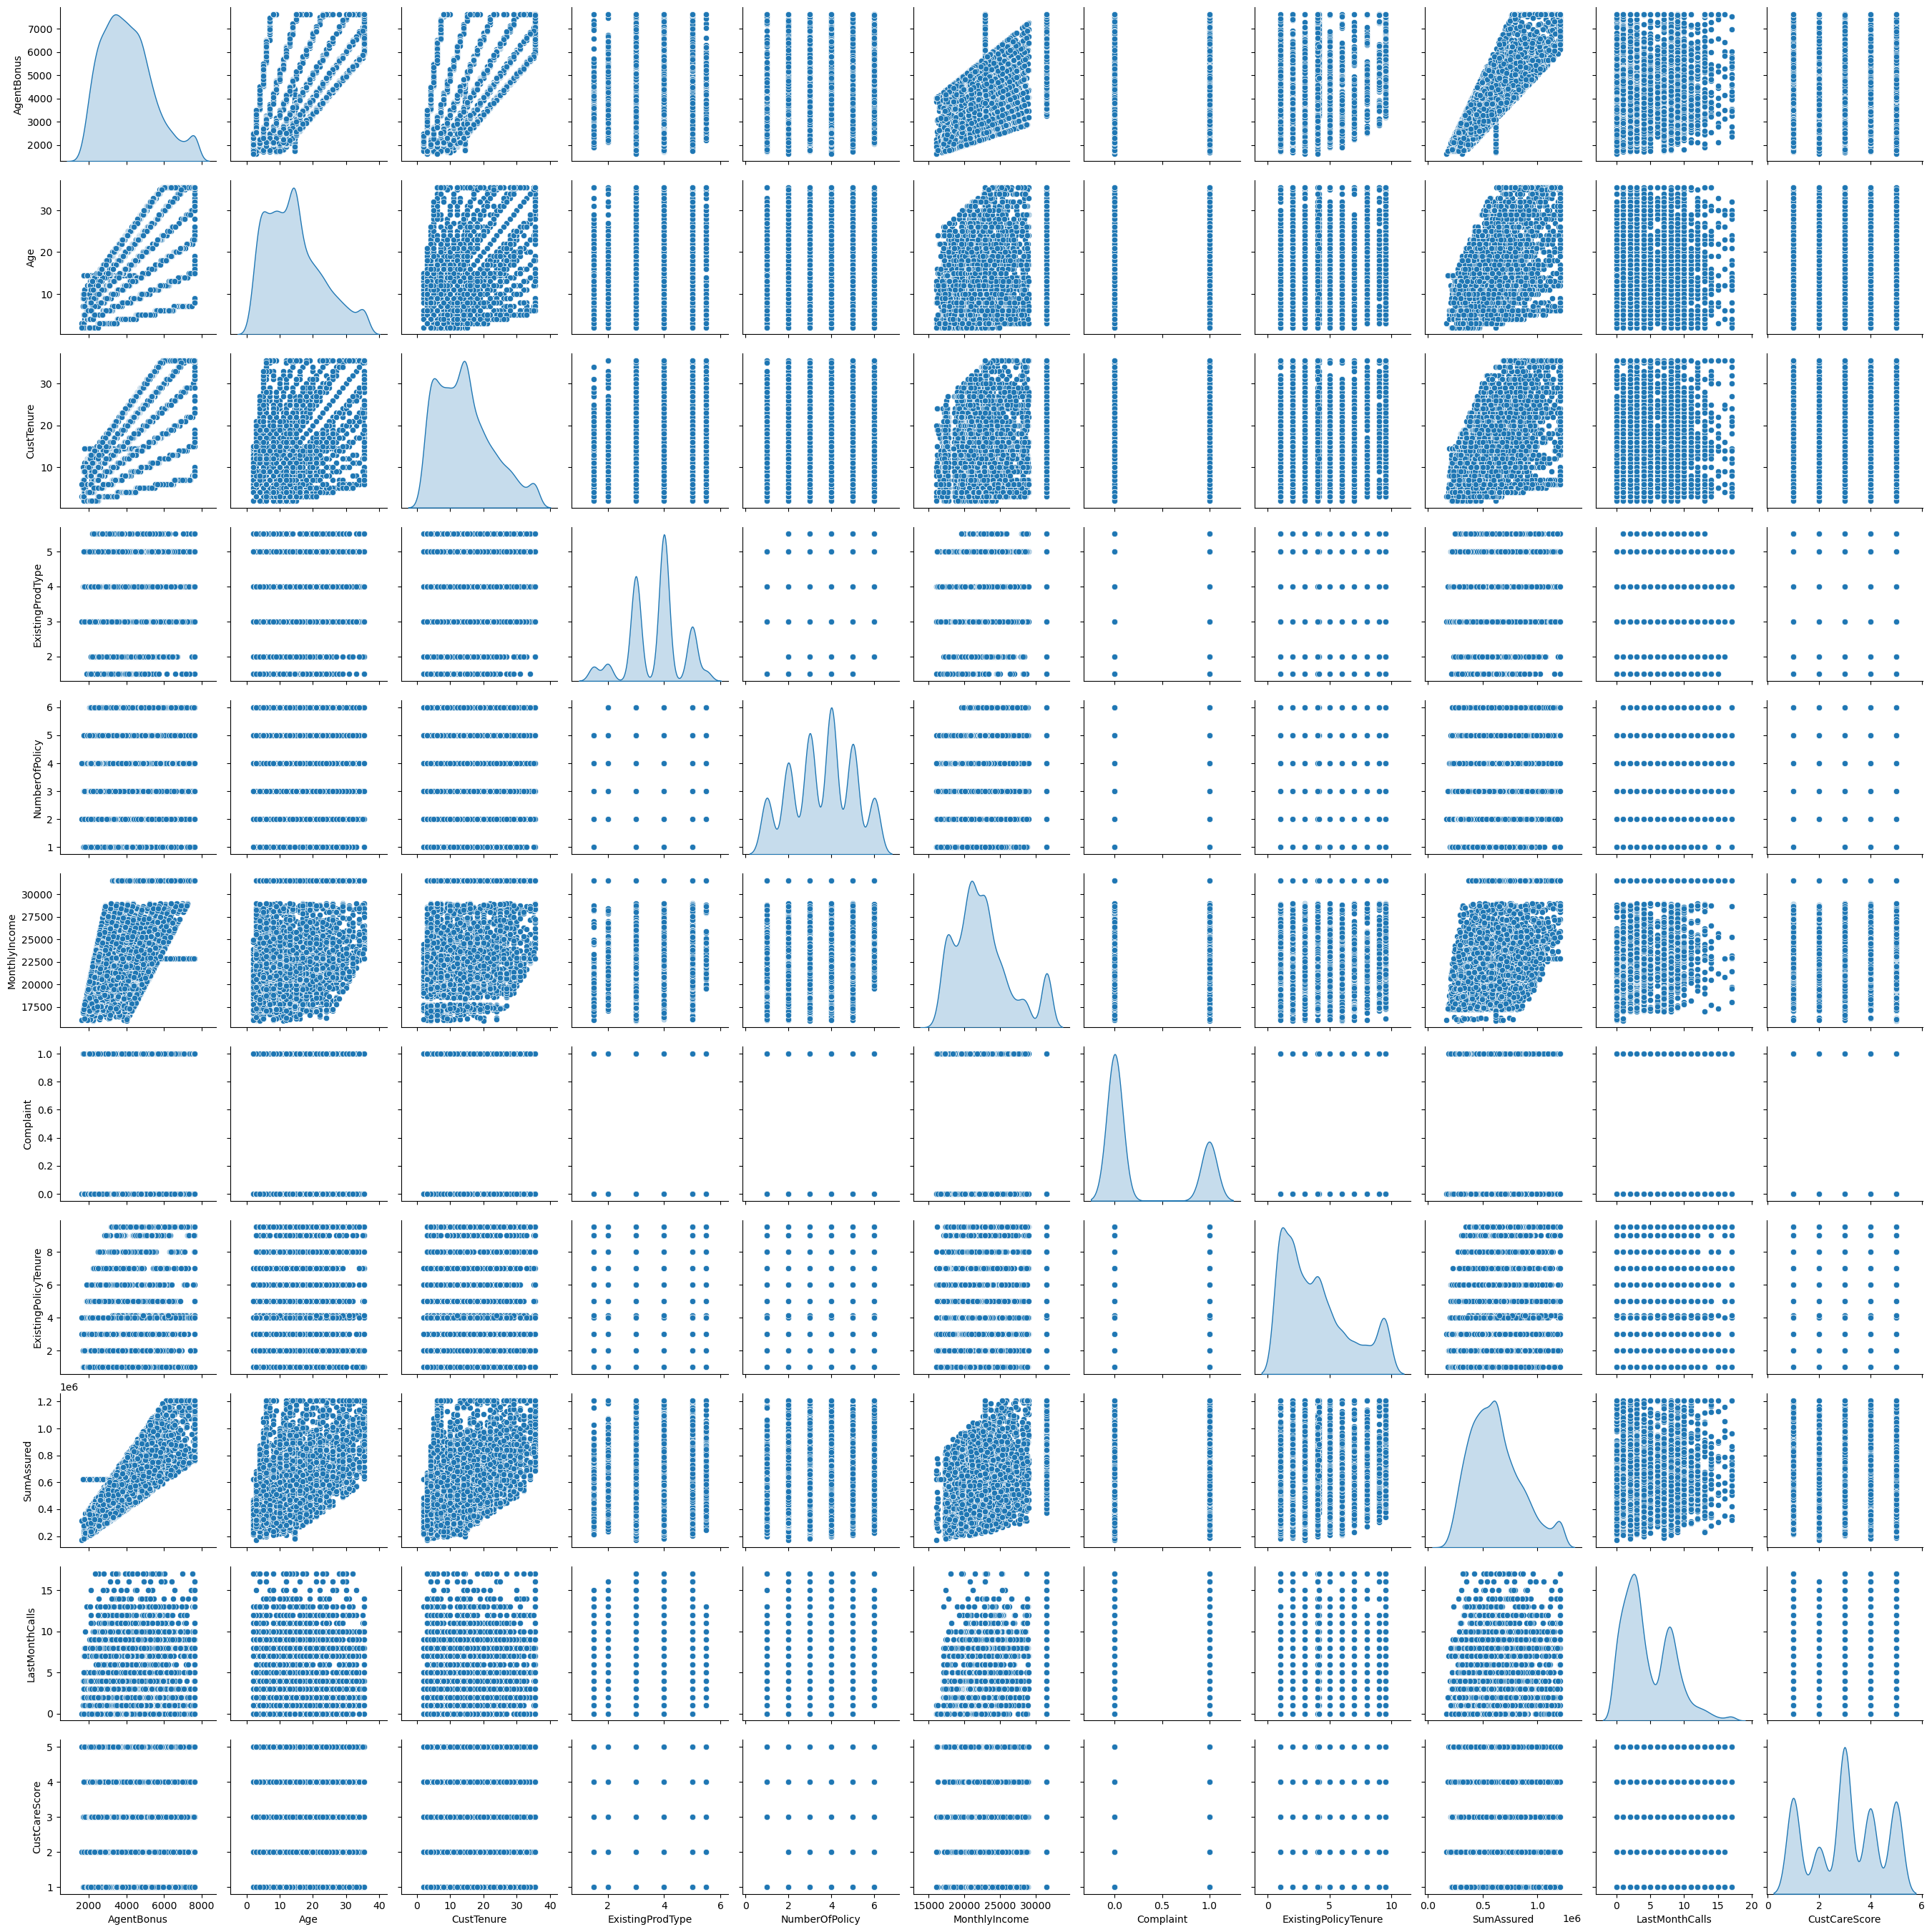

In [33]:
sns.pairplot(df,diag_kind='kde')
plt.show()

- We can observe a good linear pattern between SumAssured and our dependent variable- Agent Bonus.
- We can observe some linear pattern in MonthlyIncome, CustTenure and Age.

## Corelation plot:

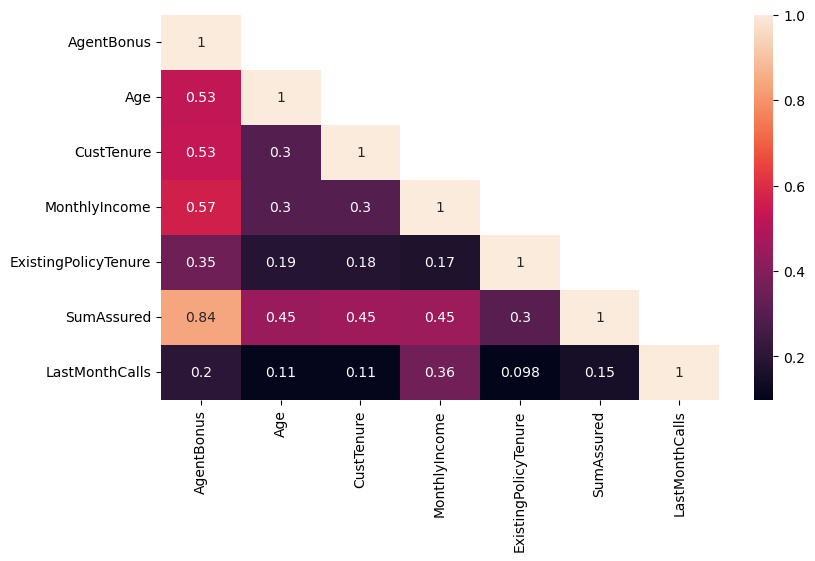

In [34]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1));

- We can observe that there is almost no multicollinearity in the data. Multicollinearity refers to more variables affect our dependant variables, here from the graph above only SumAssured makes the cut as a variable affecting the AgentBonus.
- Complaint and CustCareScore have almost no correlation with any other parameter.
- AgentBonus and SumAssured have high correlation with each other of 0.84; Age,CustTenure and MonthlyIncome shows a quite good correlation with Agent Bonus, Hence we can consider them as good predictor variables.

### Scaling and Clustering the data:

In [35]:
from scipy.stats import zscore

# Applying z-score transformation to the selected columns
df_scaled = df[cont_list].apply(zscore)

In [36]:
df_scaled.describe()

,AgentBonus,Age,CustTenure,MonthlyIncome,ExistingPolicyTenure,SumAssured,LastMonthCalls
count,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03
mean,5.082709e-16,-2.769340e-16,8.412150e-16,3.387408e-16,-1.315074e-15,1.722442e-16,-2.323608e-16
std,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00
min,-1.809669e+00,-1.478109e+00,-1.481257e+00,-1.662995e+00,-1.083937e+00,-1.951604e+00,-1.280881e+00
25%,-7.620925e-01,-7.609063e-01,-7.608761e-01,-6.880008e-01,-7.114282e-01,-7.478339e-01,-7.269072e-01
50%,-1.113836e-01,-4.370327e-02,-4.049488e-02,-1.765660e-01,-3.389196e-01,-1.129423e-01,-4.499202e-01
75%,5.923392e-01,5.539659e-01,5.598228e-01,4.959113e-01,4.060975e-01,5.850377e-01,9.350152e-01
max,2.623987e+00,2.526274e+00,2.540871e+00,2.271779e+00,2.082386e+00,2.584345e+00,3.427899e+00


In [37]:
from sklearn.cluster import KMeans

In [38]:
wss = []
for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit(df_scaled)
    wss.append(km.inertia_)
wss    

[31640.000000000015,
 22073.570885156278,
 19502.71050098096,
 17578.76586759563,
 16144.673352086389,
 15247.602119363431,
 14589.96835702057,
 13960.7408075381,
 13420.659401131137,
 12980.664943127103]

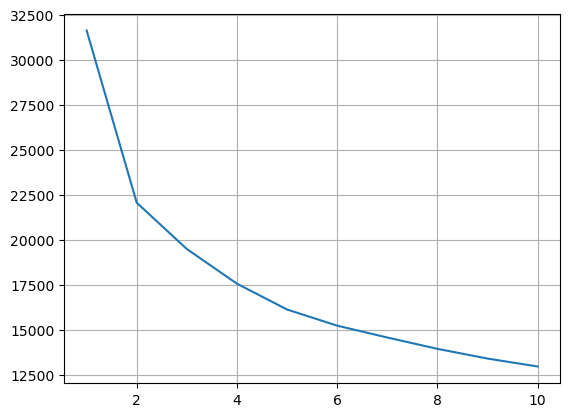

In [39]:
sns.lineplot(x = range(1,11), y = wss)
plt.grid()
plt.show()

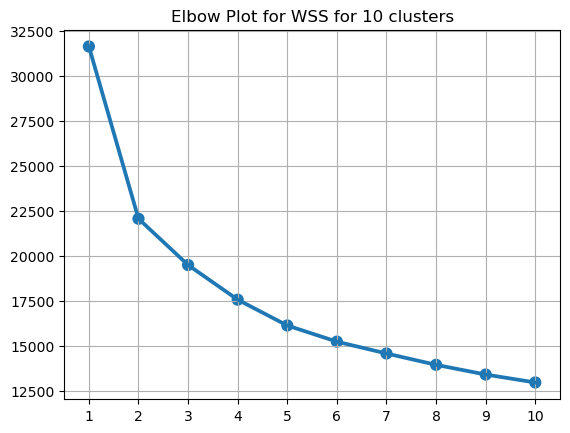

In [40]:
a = [1,2,3,4,5,6,7,8,9,10]

sns.pointplot(x = a, y = wss)
plt.title("Elbow Plot for WSS for 10 clusters")
plt.grid()
plt.show()

- While a significant drop in inertia occurs from cluster 1 to 2, analyzing just two clusters wouldn't provide enough detail for business-relevant insights. However, further analysis reveals another substantial inertia decrease from cluster 4 to 5.
- Therefore, for a more comprehensive understanding and actionable conclusions, we've chosen 5 as the optimal number of clusters for our algorithm.

In [41]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [42]:
k_means = KMeans(n_clusters = 5)
k_means.fit(df_scaled)
k_means.labels_

array([4, 3, 3, ..., 4, 1, 4])

In [43]:
labels = k_means.labels_
df['Cluster'] = labels
df

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,Cluster
0,4409.0,22.0,4.000000,Agent,Salaried,Post Graduate,Female,3.0,Manager,2.0,Unmarried,20993.000000,1.0,2.0,806761.000000,North,Half Yearly,5.0,2.0,4
1,2214.0,11.0,2.000000,Third Party Partner,Salaried,Post Graduate,Male,4.0,Manager,4.0,Divorced,20130.000000,0.0,3.0,294502.000000,North,Yearly,7.0,3.0,3
2,4273.0,26.0,4.000000,Agent,Free Lancer,Post Graduate,Male,4.0,Executive,3.0,Unmarried,17090.000000,1.0,2.0,619999.699267,North,Yearly,0.0,3.0,3
3,1791.0,11.0,14.469027,Third Party Partner,Salaried,Post Graduate,Female,3.0,Executive,3.0,Divorced,17909.000000,1.0,2.0,268635.000000,West,Half Yearly,0.0,5.0,3
4,2955.0,6.0,14.469027,Agent,Small Business,Under Graduate,Male,3.0,Executive,4.0,Divorced,18468.000000,0.0,4.0,366405.000000,West,Half Yearly,2.0,5.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,3953.0,4.0,8.000000,Agent,Small Business,Post Graduate,Male,4.0,Senior Manager,2.0,Unmarried,26355.000000,0.0,2.0,636473.000000,West,Yearly,9.0,1.0,0
4516,2939.0,9.0,9.000000,Agent,Salaried,Under Graduate,Female,2.0,Executive,2.0,Married,20991.000000,0.0,3.0,296813.000000,North,Yearly,1.0,3.0,3
4517,3792.0,23.0,23.000000,Agent,Salaried,Engineer,Female,5.0,AVP,5.0,Unmarried,22890.309991,0.0,2.0,667371.000000,North,Half Yearly,4.0,1.0,4
4518,4816.0,10.0,10.000000,Online,Small Business,Post Graduate,Female,4.0,Executive,2.0,Unmarried,20068.000000,0.0,6.0,943999.000000,West,Half Yearly,1.0,5.0,1


In [44]:
df.Cluster.value_counts().sort_index()

0     840
1     740
2     590
3    1502
4     848
Name: Cluster, dtype: int64

In [45]:
df['Frequency']=df.Cluster.value_counts()
df.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,...,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,Cluster,Frequency
0,4409.0,22.0,4.000000,Agent,Salaried,Post Graduate,Female,3.0,Manager,2.0,...,20993.0,1.0,2.0,806761.000000,North,Half Yearly,5.0,2.0,4,840.0
1,2214.0,11.0,2.000000,Third Party Partner,Salaried,Post Graduate,Male,4.0,Manager,4.0,...,20130.0,0.0,3.0,294502.000000,North,Yearly,7.0,3.0,3,740.0
2,4273.0,26.0,4.000000,Agent,Free Lancer,Post Graduate,Male,4.0,Executive,3.0,...,17090.0,1.0,2.0,619999.699267,North,Yearly,0.0,3.0,3,590.0
3,1791.0,11.0,14.469027,Third Party Partner,Salaried,Post Graduate,Female,3.0,Executive,3.0,...,17909.0,1.0,2.0,268635.000000,West,Half Yearly,0.0,5.0,3,1502.0
4,2955.0,6.0,14.469027,Agent,Small Business,Under Graduate,Male,3.0,Executive,4.0,...,18468.0,0.0,4.0,366405.000000,West,Half Yearly,2.0,5.0,3,848.0


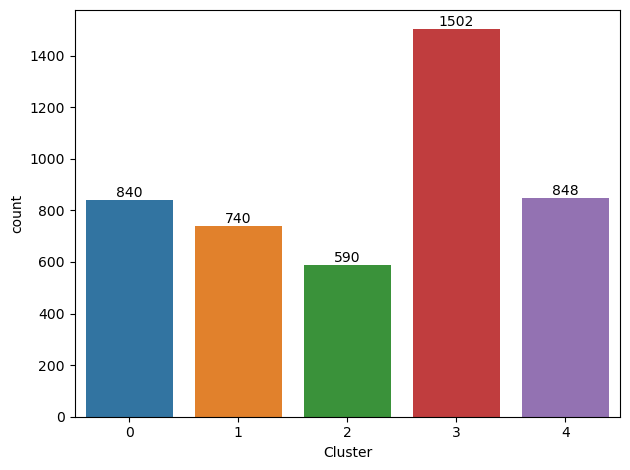

In [46]:
a = sns.countplot(x = 'Cluster', data = df)
for label in a.containers:
    a.bar_label(label)
    plt.tight_layout()
    
plt.show()

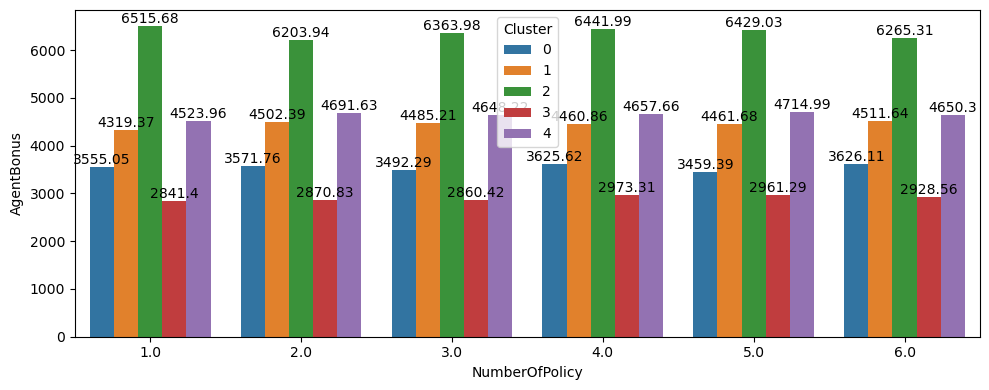

In [47]:
plt.figure(figsize = (10,4))
a = sns.barplot(hue = 'Cluster', y = 'AgentBonus',x='NumberOfPolicy' , data = df, ci = None)
for label in a.containers:
    a.bar_label(label)
    plt.tight_layout()
    
plt.show()

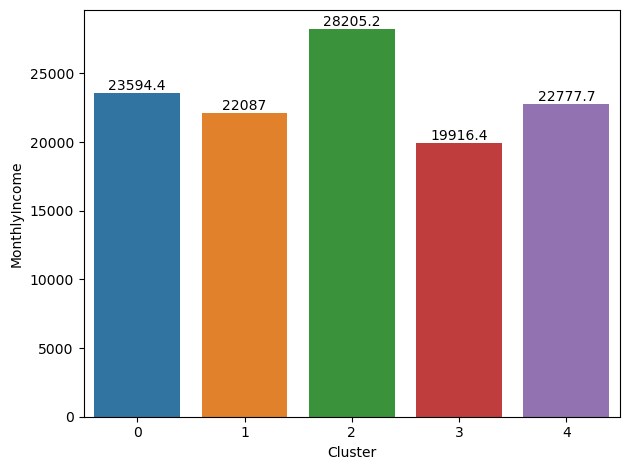

In [48]:
a = sns.barplot(x = 'Cluster', y = 'MonthlyIncome', data = df, ci = None)
for label in a.containers:
    a.bar_label(label)
    plt.tight_layout()
    
plt.show()

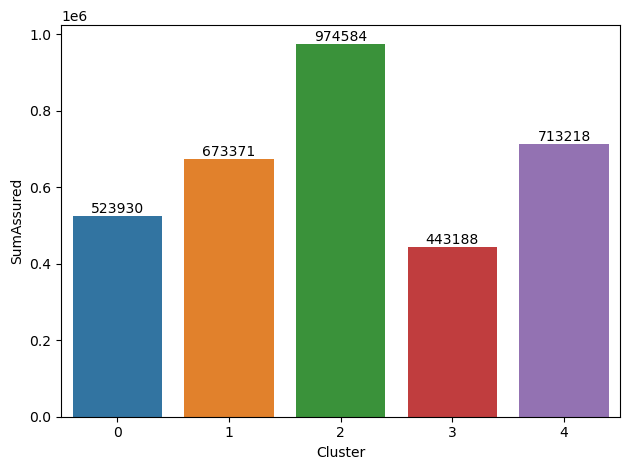

In [49]:
a = sns.barplot(x = 'Cluster', y = 'SumAssured', data = df, ci = None)
for label in a.containers:
    a.bar_label(label)
    plt.tight_layout()
    
plt.show()

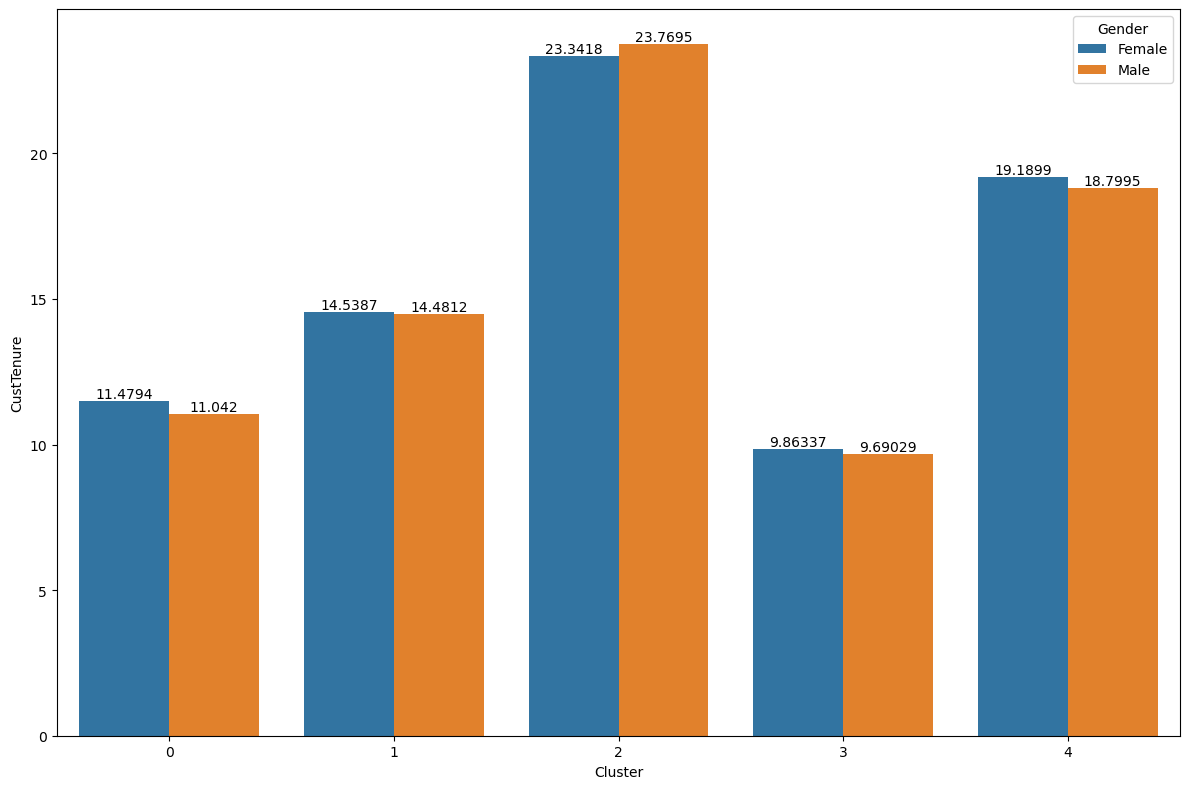

In [50]:
plt.figure(figsize=(12,8))
a= sns.barplot(x = 'Cluster', y = 'CustTenure',hue = 'Gender', data = df, ci = None)
for label in a.containers:
    a.bar_label(label)
    plt.tight_layout()
    
plt.show()

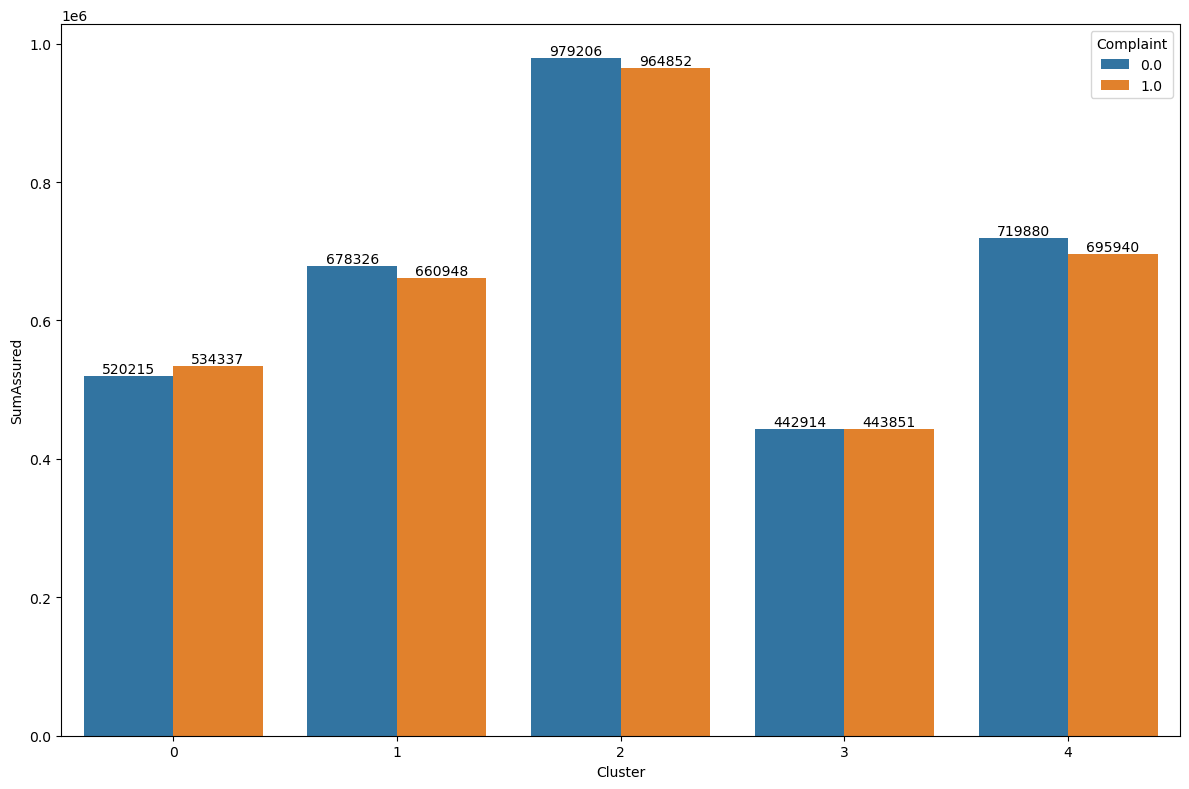

In [51]:
plt.figure(figsize=(12,8))
a = sns.barplot(x = 'Cluster', y = 'SumAssured',hue = 'Complaint', data = df, ci = None)
for label in a.containers:
    a.bar_label(label)
    plt.tight_layout()
    
plt.show()

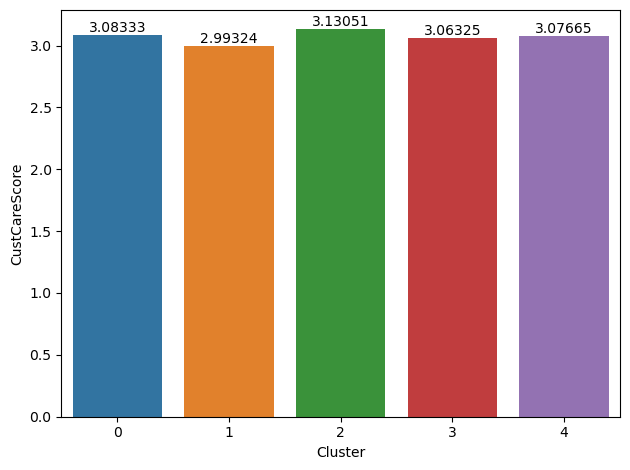

In [52]:
a = sns.barplot(x = 'Cluster', y = 'CustCareScore', data = df, ci = None)
for label in a.containers:
    a.bar_label(label)
    plt.tight_layout()
    
plt.show()

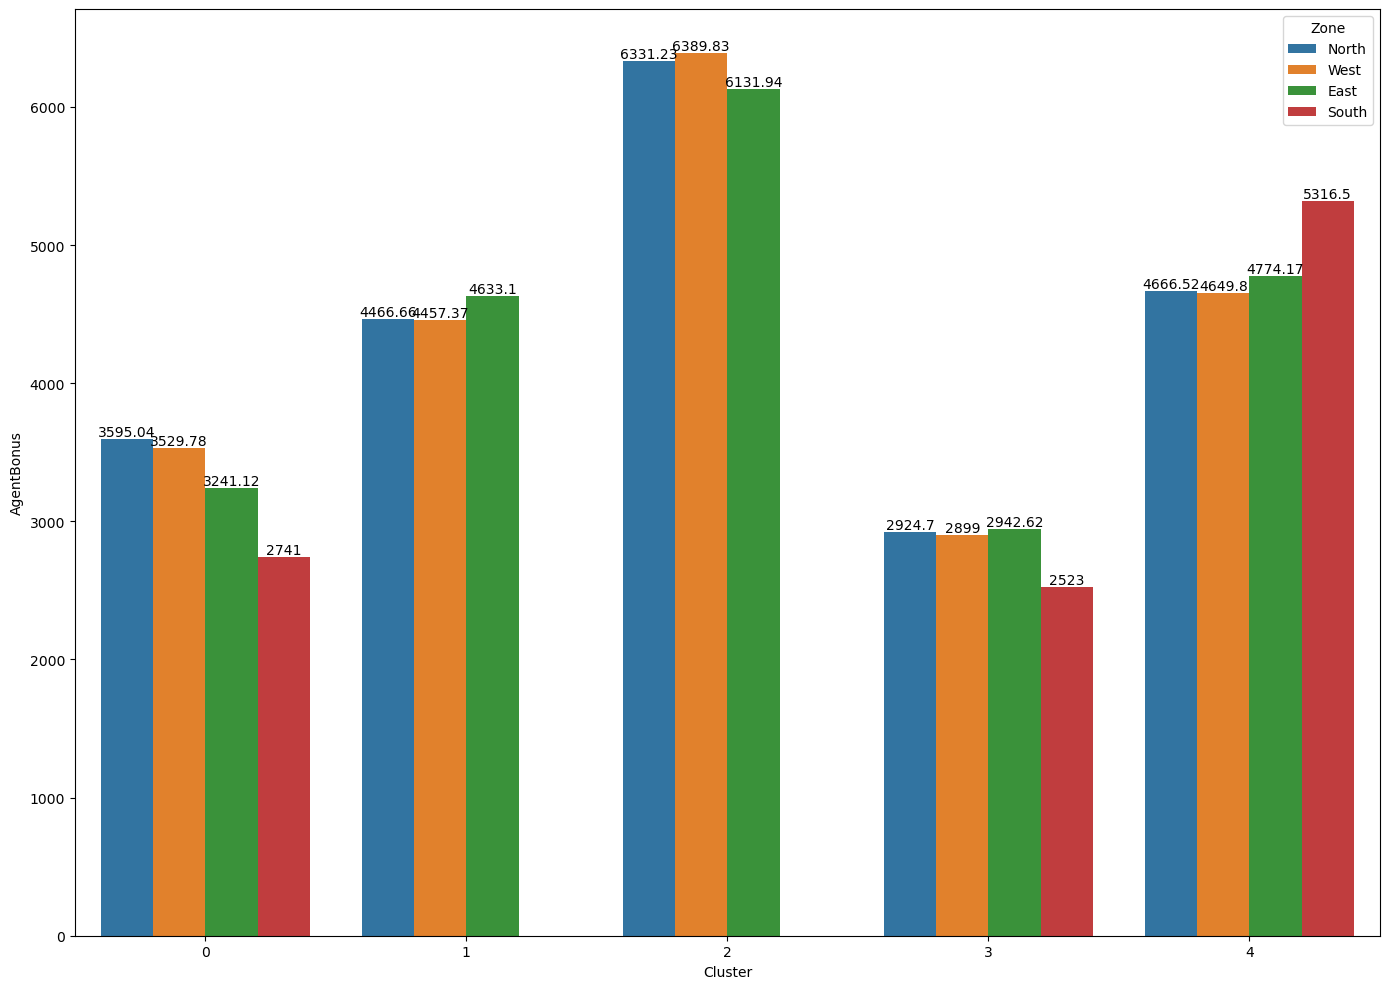

In [53]:
plt.figure(figsize=(14,10))
a= sns.barplot(x = 'Cluster', y = 'AgentBonus',hue = 'Zone', data = df, ci = None)
for label in a.containers:
    a.bar_label(label)
    plt.tight_layout()
    
plt.show()

### Unique Values:

In [54]:
# unique values for categorical columns
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CHANNEL :  3
Online                  468
Third Party Partner     858
Agent                  3194
Name: Channel, dtype: int64


OCCUPATION :  4
Free Lancer          2
Large Business     408
Small Business    1918
Salaried          2192
Name: Occupation, dtype: int64


EDUCATIONFIELD :  4
Engineer           408
Diploma            496
Under Graduate    1420
Post Graduate     2196
Name: EducationField, dtype: int64


GENDER :  2
Female    1832
Male      2688
Name: Gender, dtype: int64


EXISTINGPRODTYPE :  6
5.5     123
1.5     183
2.0     221
5.0     708
3.0    1369
4.0    1916
Name: ExistingProdType, dtype: int64


DESIGNATION :  5
VP                 226
AVP                336
Senior Manager     676
Manager           1620
Executive         1662
Name: Designation, dtype: int64


NUMBEROFPOLICY :  6
6.0     437
1.0     438
2.0     711
5.0     856
3.0     939
4.0    1139
Name: NumberOfPolicy, dtype: int64


MARITALSTATUS :  3
Divorced      804
Unmarried    1448
Married      2268
Name: Marit

### Variable Transformation:

In [55]:
df['NumberOfPolicy'] = df['NumberOfPolicy'].astype('int64')
df['ExistingProdType'] = df['ExistingProdType'].astype('int64')
df['Complaint'] = df['Complaint'].astype('int64')
df['CustCareScore'] = df['CustCareScore'].astype('int64')

df['Channel'] = np.where(df['Channel']=='Agent', 1, df['Channel'])
df['Channel'] = np.where(df['Channel']=='Third Party Partner', 2, df['Channel'])
df['Channel'] = np.where(df['Channel']=='Online', 3, df['Channel'])
df['Channel'] = df['Channel'].astype('int64')

df['Occupation'] = np.where(df['Occupation']=='Salaried',1, df['Occupation'])
df['Occupation'] = np.where(df['Occupation']=='Small Business',2, df['Occupation'])
df['Occupation'] = np.where(df['Occupation']=='Large Business',3, df['Occupation'])
df['Occupation'] = np.where(df['Occupation']=='Free Lancer',4, df['Occupation'])
df['Occupation']=df['Occupation'].astype('int64')

df['EducationField'] = np.where(df['EducationField']=='Under Graduate', 1, df['EducationField'])
df['EducationField'] = np.where(df['EducationField']=='Post Graduate', 2, df['EducationField'])
df['EducationField'] = np.where(df['EducationField']=='Engineer', 3, df['EducationField'])
df['EducationField'] = np.where(df['EducationField']=='Diploma', 4, df['EducationField'])
df['EducationField']=df['EducationField'].astype('int64')

df['Gender'] = np.where(df['Gender']=='Male',1, df['Gender'])
df['Gender'] = np.where(df['Gender']=='Female',2, df['Gender'])
df['Gender']=df['Gender'].astype('int64')

df['Designation'] = np.where(df['Designation'] =='Executive', 1, df['Designation']) 
df['Designation'] = np.where(df['Designation'] =='Manager', 2, df['Designation'])
df['Designation'] = np.where(df['Designation'] =='Senior Manager', 3, df['Designation'])
df['Designation'] = np.where(df['Designation'] =='AVP', 4, df['Designation'])
df['Designation'] = np.where(df['Designation'] =='VP', 5, df['Designation']) 
df['Designation']=df['Designation'].astype('int64')

df['MaritalStatus'] = np.where(df['MaritalStatus']=='Unmarried', 1, df['MaritalStatus'])
df['MaritalStatus'] = np.where(df['MaritalStatus']=='Married', 2, df['MaritalStatus']) 
df['MaritalStatus'] = np.where(df['MaritalStatus']=='Divorced', 3, df['MaritalStatus']) 
df['MaritalStatus']  =df['MaritalStatus'].astype('int64')

df['Zone'] = np.where(df['Zone']=='North', 1, df['Zone'])
df['Zone'] = np.where(df['Zone']=='East', 2, df['Zone'])
df['Zone'] = np.where(df['Zone']=='West', 3, df['Zone'])
df['Zone'] = np.where(df['Zone']=='South', 4, df['Zone'])
df['Zone'] = df['Zone'].astype('int64')

df['PaymentMethod'] = np.where(df['PaymentMethod']=='Monthly', 1, df['PaymentMethod'])
df['PaymentMethod'] = np.where(df['PaymentMethod']=='Quarterly', 2, df['PaymentMethod'])
df['PaymentMethod'] = np.where(df['PaymentMethod']=='Half Yearly', 3, df['PaymentMethod'])
df['PaymentMethod'] = np.where(df['PaymentMethod']=='Yearly', 4, df['PaymentMethod'])
df['PaymentMethod'] = df['PaymentMethod'].astype('int64')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   float64
 1   Age                   4520 non-null   float64
 2   CustTenure            4520 non-null   float64
 3   Channel               4520 non-null   int64  
 4   Occupation            4520 non-null   int64  
 5   EducationField        4520 non-null   int64  
 6   Gender                4520 non-null   int64  
 7   ExistingProdType      4520 non-null   int64  
 8   Designation           4520 non-null   int64  
 9   NumberOfPolicy        4520 non-null   int64  
 10  MaritalStatus         4520 non-null   int64  
 11  MonthlyIncome         4520 non-null   float64
 12  Complaint             4520 non-null   int64  
 13  ExistingPolicyTenure  4520 non-null   float64
 14  SumAssured            4520 non-null   float64
 15  Zone                 

##### All categorical variables have been transformed into continuous variables.

### Business insights from EDA: Refer to report

-------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------

# Project Notes 2:

--------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------

### Scaling data after encoding the data:

In [57]:
# scaling through zscore

df_scaled = df.apply(zscore)
df_scaled.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,...,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,Cluster,Frequency
0,0.254928,0.912567,-1.241130,-0.594015,-0.933261,0.004818,1.211301,-0.685348,-0.071796,-1.083186,...,-0.400493,1.575525,-0.711428,0.832608,-1.173514,-0.181659,0.104054,-0.775947,1.30556,NaN
1,-1.361260,-0.402305,-1.481257,0.902611,-0.933261,0.004818,-0.825559,0.350350,-0.071796,0.296941,...,-0.619100,-0.634709,-0.338920,-1.402086,-1.173514,1.081570,0.658028,-0.048597,0.59131,NaN
2,0.154790,1.390703,-1.241130,-0.594015,3.685358,0.004818,-0.825559,0.350350,-0.963334,-0.393123,...,-1.389166,1.575525,-0.711428,0.017875,-1.173514,1.081570,-1.280881,-0.048597,0.59131,NaN
3,-1.672717,-0.402305,0.015818,0.902611,-0.933261,0.004818,1.211301,-0.685348,-0.963334,-0.393123,...,-1.181704,1.575525,-0.711428,-1.514929,0.861117,-0.181659,-1.280881,1.406102,0.59131,NaN
4,-0.815659,-0.999974,0.015818,-0.594015,0.606279,-1.084106,-0.825559,-0.685348,-0.963334,0.296941,...,-1.040103,-0.634709,0.033589,-1.088414,0.861117,-0.181659,-0.726907,1.406102,0.59131,NaN


In [58]:
# description of the scaled data

df_scaled.describe()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,...,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,Cluster,Frequency
count,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03,...,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03,4.520000e+03,0.0
mean,5.082709e-16,-2.769340e-16,8.412150e-16,-2.130547e-16,2.613200e-16,7.928761e-17,-1.635860e-16,-5.813442e-15,-4.047893e-17,2.332844e-15,...,3.387408e-16,8.252985e-17,-1.315074e-15,1.722442e-16,3.183294e-16,-2.207305e-16,-2.323608e-16,-1.607151e-15,7.420809e-16,NaN
std,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,...,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,NaN
min,-1.809669e+00,-1.478109e+00,-1.481257e+00,-5.940149e-01,-9.332607e-01,-1.084106e+00,-8.255590e-01,-2.756745e+00,-9.633338e-01,-1.773250e+00,...,-1.662995e+00,-6.347089e-01,-1.083937e+00,-1.951604e+00,-1.173514e+00,-2.708118e+00,-1.280881e+00,-1.503296e+00,-1.551439e+00,NaN
25%,-7.620925e-01,-7.609063e-01,-7.608761e-01,-5.940149e-01,-9.332607e-01,-1.084106e+00,-8.255590e-01,-6.853483e-01,-9.633338e-01,-1.083186e+00,...,-6.880008e-01,-6.347089e-01,-7.114282e-01,-7.478339e-01,-1.173514e+00,-1.816591e-01,-7.269072e-01,-7.759467e-01,-8.371894e-01,NaN
50%,-1.113836e-01,-4.370327e-02,-4.049488e-02,-5.940149e-01,6.062788e-01,4.818250e-03,-8.255590e-01,3.503502e-01,-7.179637e-02,2.969412e-01,...,-1.765660e-01,-6.347089e-01,-3.389196e-01,-1.129423e-01,8.611169e-01,-1.816591e-01,-4.499202e-01,-4.859724e-02,5.913105e-01,NaN
75%,5.923392e-01,5.539659e-01,5.598228e-01,9.026112e-01,6.062788e-01,4.818250e-03,1.211301e+00,3.503502e-01,8.197410e-01,9.870050e-01,...,4.959113e-01,1.575525e+00,4.060975e-01,5.850377e-01,8.611169e-01,1.081570e+00,9.350152e-01,6.787522e-01,5.913105e-01,NaN
max,2.623987e+00,2.526274e+00,2.540871e+00,2.399237e+00,3.685358e+00,2.182667e+00,1.211301e+00,1.386049e+00,2.602816e+00,1.677069e+00,...,2.271779e+00,1.575525e+00,2.082386e+00,2.584345e+00,1.878432e+00,1.081570e+00,3.427899e+00,1.406102e+00,1.305560e+00,NaN


In [59]:
#removing not required columns i.e. cluster and frequency from our datasets

df_scaled = df_scaled.drop(['Cluster', 'Frequency'], axis = 1)
df = df.drop(['Cluster', 'Frequency'], axis = 1)

In [60]:
df_scaled.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,0.254928,0.912567,-1.241130,-0.594015,-0.933261,0.004818,1.211301,-0.685348,-0.071796,-1.083186,-1.240404,-0.400493,1.575525,-0.711428,0.832608,-1.173514,-0.181659,0.104054,-0.775947
1,-1.361260,-0.402305,-1.481257,0.902611,-0.933261,0.004818,-0.825559,0.350350,-0.071796,0.296941,1.652592,-0.619100,-0.634709,-0.338920,-1.402086,-1.173514,1.081570,0.658028,-0.048597
2,0.154790,1.390703,-1.241130,-0.594015,3.685358,0.004818,-0.825559,0.350350,-0.963334,-0.393123,-1.240404,-1.389166,1.575525,-0.711428,0.017875,-1.173514,1.081570,-1.280881,-0.048597
3,-1.672717,-0.402305,0.015818,0.902611,-0.933261,0.004818,1.211301,-0.685348,-0.963334,-0.393123,1.652592,-1.181704,1.575525,-0.711428,-1.514929,0.861117,-0.181659,-1.280881,1.406102
4,-0.815659,-0.999974,0.015818,-0.594015,0.606279,-1.084106,-0.825559,-0.685348,-0.963334,0.296941,1.652592,-1.040103,-0.634709,0.033589,-1.088414,0.861117,-0.181659,-0.726907,1.406102


### Train-Test Split:

In [61]:
# Copy all the predictor variables into X dataframe
x = df_scaled.drop('AgentBonus', axis = 1)

# Copy target into the y dataframe. 
y = df_scaled[['AgentBonus']]

#### Splitting x and y into training and test set in 75:25 ratio:

In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25 , random_state=0)

In [63]:
print(x_train.head())

           Age  CustTenure   Channel  Occupation  EducationField    Gender  \
3313 -0.163237    2.540871 -0.594015   -0.933261        0.004818 -0.825559   
4383  0.075831    2.540871  0.902611    0.606279       -1.084106  1.211301   
3610  0.314898   -0.640813 -0.594015    2.145818        1.093743  1.211301   
3417  1.629770    2.360776 -0.594015   -0.933261        0.004818 -0.825559   
2355  1.151635    1.880522 -0.594015   -0.933261        0.004818 -0.825559   

      ExistingProdType  Designation  NumberOfPolicy  MaritalStatus  \
3313          1.386049    -0.071796        0.987005      -1.240404   
4383          0.350350     0.819741        0.296941      -1.240404   
3610          0.350350     0.819741        0.296941       0.206094   
3417          0.350350    -0.071796        0.296941       0.206094   
2355          0.350350     2.602816        0.987005       0.206094   

      MonthlyIncome  Complaint  ExistingPolicyTenure  SumAssured      Zone  \
3313       0.663160  -0.634709  

In [64]:
print(x_test.head())

           Age  CustTenure   Channel  Occupation  EducationField    Gender  \
3145 -0.521839   -0.040495 -0.594015   -0.933261        0.004818 -0.825559   
72    0.015431   -1.241130 -0.594015    0.606279       -1.084106  1.211301   
1065  0.015431   -0.520749 -0.594015    0.606279        2.182667  1.211301   
2708 -0.760906    1.160140  0.902611    0.606279       -1.084106 -0.825559   
130   2.526274    1.040077 -0.594015    0.606279       -1.084106 -0.825559   

      ExistingProdType  Designation  NumberOfPolicy  MaritalStatus  \
3145          1.386049    -0.963334        0.296941       0.206094   
72            0.350350    -0.963334        0.987005       0.206094   
1065          1.386049    -0.963334        0.296941      -1.240404   
2708          0.350350    -0.963334       -0.393123      -1.240404   
130          -0.685348     1.711278        0.987005       1.652592   

      MonthlyIncome  Complaint  ExistingPolicyTenure  SumAssured      Zone  \
3145      -0.646964  -0.634709  

## Linear Regression using statsmodel(OLS)

In [65]:
import statsmodels.api as sm

In [66]:
# This adds the constant term beta0 to the Simple Linear Regression.
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)

In [67]:
olsmod = sm.OLS(y_train,x_train).fit()

# let's print the regression summary
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     748.7
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:03:06   Log-Likelihood:                -2059.3
No. Observations:                3390   AIC:                             4157.
Df Residuals:                    3371   BIC:                             4273.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0094 

#### Interpretation of the model: 
- The R-squared value tells us that our model can explain 80% of the variance in the training set.
- The coefficients tell us how one unit change in x can affect y.
- The sign of the coefficient indicates if the relationship is positive or negative.
- In this data set, for example, an increase of 1 unit in 'age' occurs with a 0.14 increase in 'AgentBonus', and a unit increase in 'zone' occurs with a 0.0067 decrease in the 'AgentBonus'.
- If any of the variables show a similar relationship with 'AgentBonus' i.e. the decrease in either of the variables increases 'AgentBonus' or vice versa , the signs of the coefficents should be same.But we observe that it is not so. This indicates the presence of multicollinearity in our data.
- Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the collinearity between variables is high, we might not be able to trust the p-values to identify independent variables that are statistically significant.
- When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

## Checking the VIF of the predictors:

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   1.001309
Age                     1.293596
CustTenure              1.301943
Channel                 1.006806
Occupation              1.034761
EducationField          1.041950
Gender                  1.011534
ExistingProdType        4.740099
Designation             4.372269
NumberOfPolicy          1.110179
MaritalStatus           1.020143
MonthlyIncome           4.761315
Complaint               1.003894
ExistingPolicyTenure    1.114496
SumAssured              1.707095
Zone                    1.011214
PaymentMethod           4.152990
LastMonthCalls          1.195470
CustCareScore           1.008918
dtype: float64



##### Since we have scaled the data above therefore the VIF values are below 5 which means low multicollinearity present in our data. Few columns show values close to 5 that means these columns have high multicollinearity present with respect to other columns whose values are low so let us drop the columns one by one and check VIF values again so that there is minimum multicollinearity present in our data.

In [69]:
x_train1 = x_train.drop(["ExistingProdType"], axis=1)
olsmod_1 = sm.OLS(y_train, x_train1)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.8 
Adjusted R-squared: 0.799


We can see that there is no change in R-squared and Adj. R-squared values that means 'ExistingProdType' is not an important predictor and hence should be removed.

In [70]:
x_train2 = x_train.drop(["MonthlyIncome"], axis=1)
olsmod_2 = sm.OLS(y_train, x_train2)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.797 
Adjusted R-squared: 0.796


We can see a decline in R-squared and Adj. R-squared after dropping 'MonthlyIncome' thereore it can be a important predictor and will not be dropped now as could lead to drop in performance of predictive model.

In [71]:
x_train3 = x_train.drop(["Designation"], axis=1)
olsmod_3 = sm.OLS(y_train, x_train3)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.798 
Adjusted R-squared: 0.797


We can see a decline in R-squared and Adj. R-squared after dropping 'Designation' thereore it can be a important predictor and hence dropping it might affect the predictive model.

In [72]:
# dropping 'ExistingProdType'

x_train = x_train.drop(['ExistingProdType'], axis=1)

In [73]:
olsmod_4 = sm.OLS(y_train, x_train)
olsres_4 = olsmod_4.fit()
print(olsres_4.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     791.5
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:03:07   Log-Likelihood:                -2061.9
No. Observations:                3390   AIC:                             4160.
Df Residuals:                    3372   BIC:                             4270.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0095 

In [74]:
vif_series2 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                   1.001296
Age                     1.292913
CustTenure              1.298220
Channel                 1.006566
Occupation              1.034582
EducationField          1.041533
Gender                  1.011361
Designation             3.418001
NumberOfPolicy          1.070161
MaritalStatus           1.019771
MonthlyIncome           3.510698
Complaint               1.003884
ExistingPolicyTenure    1.113654
SumAssured              1.706193
Zone                    1.010344
PaymentMethod           1.011452
LastMonthCalls          1.189497
CustCareScore           1.008767
dtype: float64



##### Column 'Designation' and 'MonthlyIncome' have still some multicollinearity present therefore we will remove them one by one and check the VIF values again.

In [75]:
x_train5 = x_train.drop(["Designation"], axis=1)
olsmod_5 = sm.OLS(y_train, x_train5)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.798 
Adjusted R-squared: 0.797


We can see a slight decline in our R-squared and adjusted R-squared values.

In [76]:
x_train6 = x_train.drop(["MonthlyIncome"], axis=1)
olsmod_6 = sm.OLS(y_train, x_train6)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.793


We can see a sharp decline in both values therefore it is an important predictor and should not be dropped as it could affect our predictive model.

In [77]:
# dropping 'Designation'

x_train = x_train.drop(['Designation'], axis=1)

In [78]:
olsmod_7 = sm.OLS(y_train, x_train)
olsres_7 = olsmod_7.fit()
print(olsres_7.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     831.1
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:03:07   Log-Likelihood:                -2078.3
No. Observations:                3390   AIC:                             4191.
Df Residuals:                    3373   BIC:                             4295.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0094 

In [79]:
vif_series3 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                   1.001290
Age                     1.292337
CustTenure              1.296929
Channel                 1.006538
Occupation              1.034490
EducationField          1.040320
Gender                  1.009563
NumberOfPolicy          1.034386
MaritalStatus           1.015567
MonthlyIncome           1.458428
Complaint               1.002867
ExistingPolicyTenure    1.113049
SumAssured              1.696797
Zone                    1.009573
PaymentMethod           1.011446
LastMonthCalls          1.161518
CustCareScore           1.008515
dtype: float64



##### VIF for all the features is less than or near to 2 so this shows we have no or very low multicollinearity.

### Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable and we can remove the non-significant predictor variables.

In [80]:
olsmod_7 = sm.OLS(y_train, x_train)
olsres_7 = olsmod_7.fit()
print(olsres_7.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     831.1
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:03:07   Log-Likelihood:                -2078.3
No. Observations:                3390   AIC:                             4191.
Df Residuals:                    3373   BIC:                             4295.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0094 

##### Now as observed from above many predictor columns have p-value>0.05, we will remove the columns that contains highest p-values one by one and build the model until all the p-values are less than 0.05.

In [81]:
x_train8 = x_train.drop(["Channel"], axis=1)
olsmod_8 = sm.OLS(y_train, x_train8)
olsres_8 = olsmod_8.fit()
print(olsres_8.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     886.7
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:03:07   Log-Likelihood:                -2078.3
No. Observations:                3390   AIC:                             4189.
Df Residuals:                    3374   BIC:                             4287.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0094 

In [82]:
x_train = x_train.drop(['Channel'], axis=1)

Our model was not changed after dropping 'Channel' therefore it was not a important predictor. We still have columns that have p-value > 0.05 therefore dropping them one by one.

In [83]:
x_train9 = x_train.drop(["Gender"], axis=1)
olsmod_9 = sm.OLS(y_train, x_train9)
olsres_9 = olsmod_9.fit()
print(olsres_9.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     950.3
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:03:07   Log-Likelihood:                -2078.3
No. Observations:                3390   AIC:                             4187.
Df Residuals:                    3375   BIC:                             4278.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0094 

In [84]:
x_train = x_train.drop(["Gender"], axis=1)

Our model was not changed after dropping 'Gender' therefore it was not a important predictor. We still have columns that have p-value > 0.05 therefore dropping them one by one.

In [85]:
x_train10 = x_train.drop(["EducationField"], axis=1)
olsmod_10 = sm.OLS(y_train, x_train10)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1024.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:03:07   Log-Likelihood:                -2078.3
No. Observations:                3390   AIC:                             4185.
Df Residuals:                    3376   BIC:                             4270.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0094 

In [86]:
x_train = x_train.drop(["EducationField"], axis=1)

Our model was not changed after dropping 'EducationField' therefore it was not a important predictor. We still have columns that have p-value > 0.05 therefore dropping them one by one.

In [87]:
x_train11 = x_train.drop(["NumberOfPolicy"], axis=1)
olsmod_11 = sm.OLS(y_train, x_train11)
olsres_11 = olsmod_11.fit()
print(olsres_11.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1109.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:03:07   Log-Likelihood:                -2078.3
No. Observations:                3390   AIC:                             4183.
Df Residuals:                    3377   BIC:                             4262.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0094 

In [88]:
x_train = x_train.drop(["NumberOfPolicy"], axis=1)

Our model was not changed after dropping 'NumberOfPolicy' therefore it was not a important predictor. We still have columns that have p-value > 0.05 therefore dropping them one by one.

In [89]:
x_train12 = x_train.drop(["LastMonthCalls"], axis=1)
olsmod_12 = sm.OLS(y_train, x_train12)
olsres_12 = olsmod_12.fit()
print(olsres_12.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1211.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:03:07   Log-Likelihood:                -2078.3
No. Observations:                3390   AIC:                             4181.
Df Residuals:                    3378   BIC:                             4254.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0094 

In [90]:
x_train = x_train.drop(["LastMonthCalls"], axis=1)

Our model was not changed after dropping 'LastMonthCalls' therefore it was not a important predictor. We still have columns that have p-value > 0.05 therefore dropping them one by one.

In [91]:
x_train13 = x_train.drop(["Occupation"], axis=1)
olsmod_13 = sm.OLS(y_train, x_train13)
olsres_13 = olsmod_13.fit()
print(olsres_13.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1332.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:03:07   Log-Likelihood:                -2078.5
No. Observations:                3390   AIC:                             4179.
Df Residuals:                    3379   BIC:                             4246.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0094 

In [92]:
x_train = x_train.drop(["Occupation"], axis=1)

Our model was not changed after dropping 'Occupation' therefore it was not a important predictor. We still have columns that have p-value > 0.05 therefore dropping them one by one.

In [93]:
x_train14 = x_train.drop(["Zone"], axis=1)
olsmod_14 = sm.OLS(y_train, x_train14)
olsres_14 = olsmod_14.fit()
print(olsres_14.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1480.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:03:07   Log-Likelihood:                -2078.7
No. Observations:                3390   AIC:                             4177.
Df Residuals:                    3380   BIC:                             4239.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0094 

In [94]:
x_train = x_train.drop(["Zone"], axis=1)

Our model was not changed after dropping 'Zone' therefore it was not a important predictor. We still have columns that have p-value > 0.05 therefore dropping them one by one.

In [95]:
x_train15 = x_train.drop(["MaritalStatus"], axis=1)
olsmod_15 = sm.OLS(y_train, x_train15)
olsres_15 = olsmod_15.fit()
print(olsres_15.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1665.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:03:07   Log-Likelihood:                -2079.3
No. Observations:                3390   AIC:                             4177.
Df Residuals:                    3381   BIC:                             4232.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0094 

In [96]:
x_train = x_train.drop(["MaritalStatus"], axis=1)

Our model was not changed after dropping 'MaritalStatus' therefore it was not a important predictor. We still have columns that have p-value > 0.05 therefore dropping them one by one.

In [97]:
x_train16 = x_train.drop(["Complaint"], axis=1)
olsmod_16 = sm.OLS(y_train, x_train16)
olsres_16 = olsmod_16.fit()
print(olsres_16.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1902.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:03:07   Log-Likelihood:                -2079.9
No. Observations:                3390   AIC:                             4176.
Df Residuals:                    3382   BIC:                             4225.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0094 

In [98]:
x_train = x_train.drop(["Complaint"], axis=1)

Our model R-squared value saw a change from 0.798 to 0.797 after dropping 'Complaint' , however the drop was significantly low therefore we will proceed with dropping the column.

In [99]:
x_train17 = x_train.drop(["CustCareScore"], axis=1)
olsmod_17 = sm.OLS(y_train, x_train17)
olsres_17 = olsmod_17.fit()
print(olsres_17.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     2218.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:03:08   Log-Likelihood:                -2081.2
No. Observations:                3390   AIC:                             4176.
Df Residuals:                    3383   BIC:                             4219.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0096 

In [100]:
x_train = x_train.drop(["CustCareScore"], axis=1)

Our model was not changed after dropping 'CustCareScore' therefore it was not a important predictor. We still have columns that have p-value > 0.05 therefore dropping them one by one.

In [101]:
x_train18 = x_train.drop(["PaymentMethod"], axis=1)
olsmod_18 = sm.OLS(y_train, x_train18)
olsres_18 = olsmod_18.fit()
print(olsres_18.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     2659.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:03:08   Log-Likelihood:                -2082.7
No. Observations:                3390   AIC:                             4177.
Df Residuals:                    3384   BIC:                             4214.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0097 

In [102]:
x_train = x_train.drop(["PaymentMethod"], axis=1)

Since all the p-values are less than 0.05, therefore no non-significant predictor variables present in the data.

In [103]:
olsmod_19 = sm.OLS(y_train, x_train)
olsres_19 = olsmod_19.fit()
print(olsres_19.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     2659.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:03:08   Log-Likelihood:                -2082.7
No. Observations:                3390   AIC:                             4177.
Df Residuals:                    3384   BIC:                             4214.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0097 

### After dropping the features causing strong multicollinearity and the statistically insignificant ones, our model performance hasn't dropped sharply (Adj. R-squared has dropped from 0.799 to 0.797). This shows that these variables did not have much predictive power.

### Assumptions of Linear Regression

These assumptions are essential conditions that should be met before we draw inferences regarding the model estimates or use the model to make a prediction.

For Linear Regression, we need to check if the following assumptions hold:-

1. Linearity
2. Independence
3. Homoscedasticity
4. Normality of error terms
5. No strong Multicollinearity

In [104]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_19.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_19.resid.values  # residuals

df_pred.head()



,Actual Values,Fitted Values,Residuals
0,1.645806,1.955585,-0.309778
1,2.623987,2.003276,0.620710
2,-0.889289,-0.429097,-0.460192
3,1.178990,1.607225,-0.428236
4,1.438169,2.284185,-0.846016


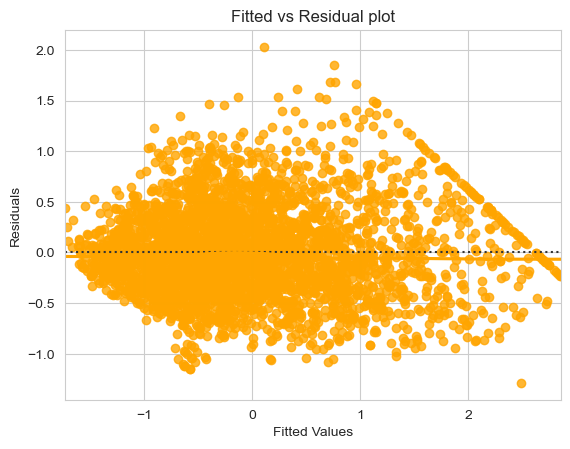

In [105]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="orange", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

From this plot we are unable to recognize any pattern.

### Test for Normality
- It can be checked via QQ Plot - residuals following normal distribution will make a straight line plot, otherwise not.
- Another test to check for normality is the Shapiro-Wilk test.

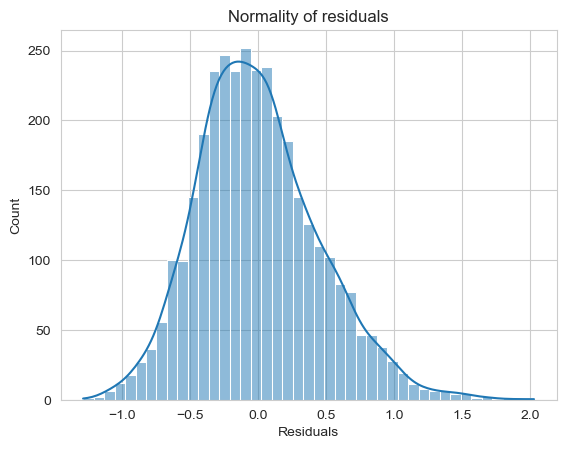

In [106]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

Residuals seems to be biased. The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

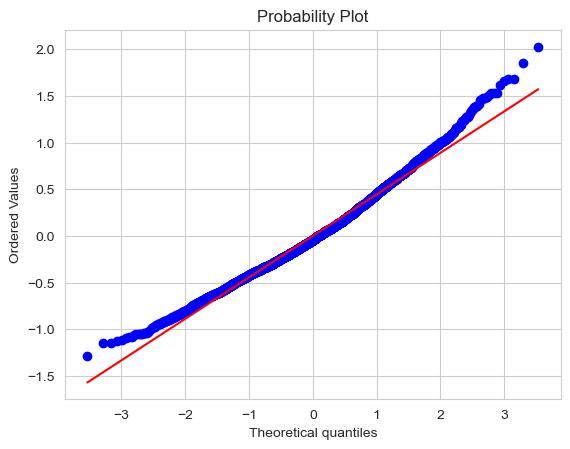

In [107]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

Many points lie out of the straight line, hence we can say that residuals are not normally distributed.

#### The Shapiro-Wilk test can also be used for checking the normality. The null and alternate hypotheses of the test are as follows:

* Null hypothesis - Data is normally distributed.
* Alternate hypothesis - Data is not normally distributed.

In [108]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9861223697662354, pvalue=9.802835548485288e-18)

Since p-value < 0.05, the residuals are not normal as per shapiro test.

### Test for Homoscedasticity
- Using the goldfeldquandt test. If we get p-value > 0.05 we can say that the residuals are homoscedastic, otherwise they are heteroscedastic.

In [109]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [110]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train)
lzip(name, test)

[('F statistic', 0.8795126551867493), ('p-value', 0.9958166280924484)]

Since p-value > 0.05 we can say that the residuals are homoscedastic.

### All the assumptions of linear regression are now satisfied. Let's check the summary of our final model (olsres_19).

In [111]:
print(olsres_19.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     2659.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:03:11   Log-Likelihood:                -2082.7
No. Observations:                3390   AIC:                             4177.
Df Residuals:                    3384   BIC:                             4214.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0097 

In [112]:
# let's check the model parameters
olsres_19.params

const                  -0.009661
Age                     0.142861
CustTenure              0.152559
MonthlyIncome           0.196757
ExistingPolicyTenure    0.074325
SumAssured              0.593686
dtype: float64

In [113]:
# Let us write the equation of linear regression
Equation = "log_price ="
print(Equation, end=" ")
for i in range(len(x_train.columns)):
    if i == 0:
        print(olsres_19.params[i], "+", end=" ")
    elif i != len(x_train.columns) - 1:
        print(
            olsres_19.params[i],
            "* (",
            x_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_19.params[i], "* (", x_train.columns[i], ")")

log_price = -0.009660583601869797 + 0.14286076190154093 * ( Age ) +  0.1525593767896418 * ( CustTenure ) +  0.19675718090636127 * ( MonthlyIncome ) +  0.07432498776417318 * ( ExistingPolicyTenure ) +  0.5936859786274834 * ( SumAssured )


### Observations

* R-squared of the model is 0.797 and adjusted R-squared is 0.797, which shows that the model is able to explain ~79.7% variance in the data.
- 1 unit increase in the age lead to a 0.14 times increase in the AgentBonus.
- 1 unit increase in the CustTenure lead to a 0.15 times increase in the AgentBonus.
- 1 unit increase in the MonthlyIncome lead to a 0.19 times increase in the AgentBonus.
- 1 unit increase in the SumAssured lead to a 0.59 times increase in the AgentBonus.
- Model is homoscedastic , so the spread of the errors (difference between predicted and actual values) remains consistent regardless of the value of the independent variable(s).

### Predictions on test data:

In [114]:
x_train.columns

Index(['const', 'Age', 'CustTenure', 'MonthlyIncome', 'ExistingPolicyTenure',
       'SumAssured'],
      dtype='object')

In [115]:
x_test.columns

Index(['const', 'Age', 'CustTenure', 'Channel', 'Occupation', 'EducationField',
       'Gender', 'ExistingProdType', 'Designation', 'NumberOfPolicy',
       'MaritalStatus', 'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure',
       'SumAssured', 'Zone', 'PaymentMethod', 'LastMonthCalls',
       'CustCareScore'],
      dtype='object')

In [116]:
# dropping columns from the test data that are not there in the training data
x_test2 = x_test.drop(
    ['Channel', 'Occupation', 'EducationField','Gender', 'ExistingProdType', 'Designation', 'NumberOfPolicy',
     'MaritalStatus',  'Complaint', 'Zone', 'PaymentMethod', 'LastMonthCalls','CustCareScore'], axis=1)

## Test Model summary:

In [117]:
olsmod_19 = sm.OLS(y_test, x_test2)
olsres_19 = olsmod_19.fit()
print(olsres_19.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     833.4
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:03:11   Log-Likelihood:                -750.07
No. Observations:                1130   AIC:                             1512.
Df Residuals:                    1124   BIC:                             1542.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0306 

In [118]:
# let's make predictions on the test set
y_pred_test = olsres_19.predict(x_test2)
y_pred_train = olsres_19.predict(x_train)

In [119]:
# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [120]:
# let's check the RMSE on the train and test data
rmse1 = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE on the train data: ", rmse1)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE on the test data: ", rmse2)

RMSE on the train data:  0.45007862380613206
RMSE on the test data:  0.4699334578177882


In [121]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(y_train,y_pred_train)
print("MAE on the train data: ", mae1)
mae2 = mean_absolute_error(y_test,y_pred_test)
print("MAE on the test data: ", mae2)

MAE on the train data:  0.3574697959958651
MAE on the test data:  0.37306635992109716


* We can see that RMSE on the train and test sets are comparable. So, our model is not suffering from overfitting.
* MAE indicates that our current model is able to predict mpg within a mean error of 0.37 units on the test data.
* Hence, we can conclude the model "ols_res19" is good for prediction as well as inference purposes.

### Linear Regression using (sklearn):

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [124]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for const is 0.0
The coefficient for Age is 0.1428607619015414
The coefficient for CustTenure is 0.1525593767896416
The coefficient for MonthlyIncome is 0.19675718090636116
The coefficient for ExistingPolicyTenure is 0.07432498776417355
The coefficient for SumAssured is 0.593685978627483


In [125]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.00966058360186994


In [126]:
# R square on training data
print("R square on training data: ",regression_model.score(x_train, y_train))

# R square on testing data
print("R square on testing data: ", regression_model.score(x_test2, y_test))

R square on training data:  0.7971254156513159
R square on testing data:  0.7853385144076268


In [127]:
r2_train = regression_model.score(x_train, y_train)
r2_test = regression_model.score(x_test2, y_test)
n = x.shape[0]
p = x.shape[1]

adj_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
print("Adj. R-squared for train data",adj_r2_train)
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
print("Adj. R-squared for test data",adj_r2_test)

Adj. R-squared for train data 0.7963140976068199
Adj. R-squared for test data 0.7844800592330738


In [128]:
#RMSE on Training data
predicted_train=regression_model.fit(x_train, y_train).predict(x_train)
print("RMSE on Training Data: ", np.sqrt(metrics.mean_squared_error(y_train,predicted_train)))

#RMSE on Testing data
predicted_test=regression_model.fit(x_train, y_train).predict(x_test2)
print("RMSE on Testing Data: ", np.sqrt(metrics.mean_squared_error(y_test,predicted_test)))

RMSE on Training Data:  0.4472817960289378
RMSE on Testing Data:  0.4723953400482933


In [129]:
#MAE on Training data
pd_train=regression_model.fit(x_train, y_train).predict(x_train)
print("MAE on Training Data: ",metrics.mean_absolute_error(y_train,predicted_train))

#MAE on Testing data
pd_test=regression_model.fit(x_train, y_train).predict(x_test2)
print("MAE on Testing Data: ",metrics.mean_absolute_error(y_test,predicted_test))

MAE on Training Data:  0.35217302996905336
MAE on Testing Data:  0.371224503324369


#### RMSE and MAE for train and test data are almost similar that means our model is good for prediction and inferences.

## Lasso Model:

In [130]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [131]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.1)
lasso_model = lasso.fit(x_train, y_train)
print("Lasso Coefficients:", (lasso.coef_))
lasso_model

Lasso Coefficients: [0.         0.08916657 0.0991848  0.14207354 0.00447369 0.58708701]


Lasso(alpha=0.1)

In [132]:
## Performance Matrix on train data set
y_train_predict_lasso = lasso_model.predict(x_train)
model_score_lasso = lasso_model.score(x_train, y_train)
mse_lasso = mean_squared_error(y_train, y_train_predict_lasso)
r2_lasso = r2_score(y_train, y_train_predict_lasso)
adjusted_r2_lasso = 1-(1-r2_lasso)*(len(x_train))/(len(x_train)-x_train.shape[1]-1)
mape_lasso = mean_absolute_error(y_train, y_train_predict_lasso)

print("MODEL PERFORMANCE ON TRAIN DATA: ")
print("R-squared value of Linear Regression Model:", np.round(r2_lasso,4))
print("Adjusted R-squared value of  lasso Model:", np.round(adjusted_r2_lasso,4))
print("Root Mean Squared Error:", np.round(np.sqrt(mse_lasso),4))
print("Mean Absolute Error(MAE) for lasso model:", np.round(mape_lasso,2))


MODEL PERFORMANCE ON TRAIN DATA: 
R-squared value of Linear Regression Model: 0.773
Adjusted R-squared value of  lasso Model: 0.7725
Root Mean Squared Error: 0.4732
Mean Absolute Error(MAE) for lasso model: 0.37


In [133]:
### Performance Matrix on test data set
y_test_predict_lasso = lasso_model.predict(x_test2)
model_score_lasso = lasso_model.score(x_test2, y_test)
mse_lasso = mean_squared_error(y_test, y_test_predict_lasso)
r2_lasso = r2_score(y_test, y_test_predict_lasso)
adjusted_r2_lasso = 1-(1-r2_lasso)*(len(x_test2))/(len(x_test2)-x_test2.shape[1]-1)
mape_lasso = mean_absolute_error(y_test, y_test_predict_lasso)

print("MODEL PERFORMANCE ON TEST DATA-")
print("R-squared value of Linear Regression Model:", np.round(r2_lasso,4))
print("Adjusted R-squared value of  lasso Model:", np.round(adjusted_r2_lasso,4))
print("Root Mean Squared Error:", np.round(np.sqrt(mse_lasso),4))
print("Mean Absolute Error(MAE) for lasso model:", np.round(mape_lasso,4))


MODEL PERFORMANCE ON TEST DATA-
R-squared value of Linear Regression Model: 0.7563
Adjusted R-squared value of  lasso Model: 0.7548
Root Mean Squared Error: 0.5033
Mean Absolute Error(MAE) for lasso model: 0.3977


#### RMSE and MAE for train and test data are almost similar that means our model is good for prediction and inferences but performance of linear regression is better than lasso model.

## Decision Tree Regressor:

In [134]:
from sklearn.tree import DecisionTreeRegressor

In [135]:
dt = DecisionTreeRegressor(random_state = 142)
DT = dt.fit(x_train, y_train)

In [136]:
## Performance Matrix on train data set
dt_pred_train = DT.predict(x_train)
model_score_dt = DT.score(x_train, y_train)
mse_dt = mean_squared_error(y_train, dt_pred_train)
r2_dt = r2_score(y_train, dt_pred_train)
adjusted_r2_dt = 1-(1-r2_dt)*(len(x_train))/(len(x_train)-x_train.shape[1]-1)
mape_dt = mean_absolute_error(y_train, dt_pred_train)

print("MODEL PERFORMANCE ON TRAIN DATA-")
print("R-squared value of Decision Tree Regression Model:", np.round(r2_dt,4))
print("Adjusted R-squared value of Decision Tree Model:", np.round(adjusted_r2_dt,4))
print("Root Mean Squared Error:", np.round(np.sqrt(mse_dt),4))
print("Mean Absolute Error(MAE) for dt model:",np.round(mape_dt,4))


MODEL PERFORMANCE ON TRAIN DATA-
R-squared value of Decision Tree Regression Model: 1.0
Adjusted R-squared value of Decision Tree Model: 1.0
Root Mean Squared Error: 0.0046
Mean Absolute Error(MAE) for dt model: 0.0001


In [137]:
## Performance Matrix on test data set
dt_pred_test = DT.predict(x_test2)
model_score_dt = DT.score(x_test2, y_test)
mse_dt = mean_squared_error(y_test, dt_pred_test)
r2_dt = r2_score(y_test, dt_pred_test)
adjusted_r2_dt = 1-(1-r2_dt)*(len(x_test2))/(len(x_test2)-x_test2.shape[1]-1)
mape_dt = mean_absolute_error(y_test, dt_pred_test)

print("MODEL PERFORMANCE ON TEST DATA-")

print("R-squared value of Decision Tree Regression Model:", np.round(r2_dt,4))
print("Adjusted R-squared value of Decision Tree Model:", np.round(adjusted_r2_dt,4))
print("Root Mean Squared Error:", np.round(np.sqrt(mse_dt),4))
print("Mean Absolute Error(MAE) for dt model:", np.round(mape_dt,4))


MODEL PERFORMANCE ON TEST DATA-
R-squared value of Decision Tree Regression Model: 0.7268
Adjusted R-squared value of Decision Tree Model: 0.7251
Root Mean Squared Error: 0.5329
Mean Absolute Error(MAE) for dt model: 0.3661


## Random Forest Regressor:

In [138]:
from sklearn.ensemble import RandomForestRegressor

In [139]:
rf = RandomForestRegressor(random_state = 142)
rf

RandomForestRegressor(random_state=142)

In [140]:
rfr = rf.fit(x_train, y_train)

In [169]:
rfr.feature_importances_

array([0.        , 0.08250104, 0.0757877 , 0.07610799, 0.01918293,
       0.74642034])

### Model Equation:   0 + 0.08250104 * ( Age ) +  0.0757877 * ( CustTenure ) +  0.07610799 * ( MonthlyIncome ) +  0.01918293 * ( ExistingPolicyTenure ) +  0.74642034 * ( SumAssured )

In [141]:
score = rfr.score(x_train, y_train)
print("Random Forest Regressor Model score on train data:", np.round(score, 4))
score = rfr.score(x_test2, y_test)
print("Random Forest Regressor Model score on test data:", np.round(score, 4))

Random Forest Regressor Model score on train data: 0.9804
Random Forest Regressor Model score on test data: 0.8553


In [142]:
## Performance Matrix on train data set
rfr_pred_train = rfr.predict(x_train)
model_score_rfr = rfr.score(x_train, y_train)
mse_rfr = mean_squared_error(y_train, rfr_pred_train)
r2_rfr = r2_score(y_train, rfr_pred_train)
adjusted_r2_rfr = 1-(1-r2_rfr)*(len(x_train))/(len(x_train)-x_train.shape[1]-1)
mape_rfr = mean_absolute_error(y_train, rfr_pred_train)

print("MODEL PERFORMANCE ON TRAIN DATA-")

print("R-squared value of Random Forest Regressor Regression Model:", np.round(r2_rfr,4))
print("Adjusted R-squared value of Random Forest Regressor Model:", np.round(adjusted_r2_rfr,4))
print("Root Mean Squared Error:", np.round(np.sqrt(mse_rfr),4))
print("Mean Absolute Error(MAE) for rfr model:", np.round(mape_rfr,4))


MODEL PERFORMANCE ON TRAIN DATA-
R-squared value of Random Forest Regressor Regression Model: 0.9804
Adjusted R-squared value of Random Forest Regressor Model: 0.9804
Root Mean Squared Error: 0.139
Mean Absolute Error(MAE) for rfr model: 0.1025


In [143]:
## Performance Matrix on test data set
rfr_pred_test = rfr.predict(x_test2)
model_score_rfr = rfr.score(x_test2, y_test)
mse_rfr = mean_squared_error(y_test, rfr_pred_test)
r2_rfr = r2_score(y_test, rfr_pred_test)
adjusted_r2_rfr = 1-(1-r2_rfr)*(len(x_test2))/(len(x_test2)-x_test2.shape[1]-1)
mape_rfr = mean_absolute_error(y_test, rfr_pred_test)

print("MODEL PERFORMANCE ON test DATA-")

print("R-squared value of Random Forest Regressor Regression Model:", np.round(r2_rfr,4))
print("Adjusted R-squared value of Random Forest Regressor Model:", np.round(adjusted_r2_rfr,4))
print("Root Mean Squared Error:", np.round(np.sqrt(mse_rfr),4))
print("Mean Absolute Error(MAE) for rfr model:", round(mape_rfr,4))


MODEL PERFORMANCE ON test DATA-
R-squared value of Random Forest Regressor Regression Model: 0.8553
Adjusted R-squared value of Random Forest Regressor Model: 0.8544
Root Mean Squared Error: 0.3879
Mean Absolute Error(MAE) for rfr model: 0.2925


## Model Tuning:

### Decision Tree:

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
param_grid = {
    'max_depth':[10,20,30,50],
    'min_samples_leaf':[50,100,150],
    'min_samples_split':[50,100,150,300,450],
}

dtrg = DecisionTreeRegressor(random_state = 42)

In [146]:
gs = GridSearchCV(estimator = dtrg, param_grid = param_grid, cv=3)

In [147]:
gs.fit(x_train, y_train)
print(gs.best_params_)
best_grid = gs.best_estimator_
best_grid

{'max_depth': 20, 'min_samples_leaf': 50, 'min_samples_split': 50}


DecisionTreeRegressor(max_depth=20, min_samples_leaf=50, min_samples_split=50,
                      random_state=42)

In [148]:
best_tree_score = best_grid.score(x_train, y_train)
print("Tuned Decision Tree Score on train data:", np.round(best_tree_score,4))

Tuned Decision Tree Score on train data: 0.8266


In [149]:
best_tree_score = best_grid.score(x_test2, y_test)
print("Tuned Decision Tree Score on test data:", np.round(best_tree_score,4))

Tuned Decision Tree Score on test data: 0.7956


In [150]:
## Performance Matrix on train data set
best_dtr_pred_train = best_grid.predict(x_train)
model_score_dtr = best_grid.score(x_train, y_train)
mse_dtr = mean_squared_error(y_train, best_dtr_pred_train)
r2_dtr = r2_score(y_train, best_dtr_pred_train)
adjusted_r2_dtr = 1-(1-r2_dtr)*(len(x_train))/(len(x_train)-x_train.shape[1]-1)
mape_dtr = mean_absolute_error(y_train, best_dtr_pred_train)

print("MODEL PERFORMANCE ON TRAIN DATA-")

print("R-squared value of Decision Tree Regression Model:", np.round(r2_dtr,4))
print("Adjusted R-squared value of Decision Tree Model:", np.round(adjusted_r2_dtr,4))
print("Root Mean Squared Error:", np.round(np.sqrt(mse_dtr),4))
print("Mean Absolute Error(MAE) for dtr model:", np.round(mape_dtr,4))


MODEL PERFORMANCE ON TRAIN DATA-
R-squared value of Decision Tree Regression Model: 0.8266
Adjusted R-squared value of Decision Tree Model: 0.8262
Root Mean Squared Error: 0.4136
Mean Absolute Error(MAE) for dtr model: 0.3239


In [151]:
## Performance Matrix on test data set
best_dtr_pred_test = best_grid.predict(x_test2)
model_score_dtr = best_grid.score(x_test2, y_test)
mse_dtr = mean_squared_error(y_test, best_dtr_pred_test)
r2_dtr = r2_score(y_test, best_dtr_pred_test)
adjusted_r2_dtr = 1-(1-r2_dtr)*(len(x_test2))/(len(x_test2)-x_test2.shape[1]-1)
mape_dtr = mean_absolute_error(y_test, best_dtr_pred_test)

print("MODEL PERFORMANCE ON TEST DATA-")

print("R-squared value of Decision Tree Regression Model:", np.round(r2_dtr,4))
print("Adjusted R-squared value of Decision Tree Model:", np.round(adjusted_r2_dtr,4))
print("Root Mean Squared Error:", np.round(np.sqrt(mse_dtr),4))
print("Mean Absolute Error(MAE) for dtr model:", np.round(mape_dtr,4))


MODEL PERFORMANCE ON TEST DATA-
R-squared value of Decision Tree Regression Model: 0.7956
Adjusted R-squared value of Decision Tree Model: 0.7943
Root Mean Squared Error: 0.461
Mean Absolute Error(MAE) for dtr model: 0.3597


### Random Forest Regressor:

In [152]:
param_grid = {
    'max_depth':[10,20,30,40],
    'max_features':[6,7,8,9],
    'min_samples_leaf':[10,50,100],
    'min_samples_split':[50,60,70],
    'n_estimators':[100,200,300]
}

rf = RandomForestRegressor(random_state = 42)

In [153]:
gs = GridSearchCV(estimator = rf, param_grid = param_grid, cv =5)

In [154]:
rfgs = gs.fit(x_train, y_train)

In [155]:
rfgs.best_params_

{'max_depth': 20,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 200}

In [156]:
best_grid = rfgs.best_estimator_
best_grid

RandomForestRegressor(max_depth=20, max_features=6, min_samples_leaf=10,
                      min_samples_split=50, n_estimators=200, random_state=42)

In [157]:
rfgs_score = best_grid.score(x_train, y_train)
print("Random Forest GridSearchCV score on Train Data:", np.round(rfgs_score,4))

Random Forest GridSearchCV score on Train Data: 0.88


In [158]:
rfgs_score = best_grid.score(x_test2, y_test)
print("Random Forest GridSearchCV score on Test Data:", np.round(rfgs_score,4))

Random Forest GridSearchCV score on Test Data: 0.8448


In [159]:
## Performance Matrix on train data set
best_rfr_pred_train = rfgs.predict(x_train)
model_score_rfr = rfgs.score(x_train, y_train)
mse_rfr = mean_squared_error(y_train, best_rfr_pred_train)
r2_rfr = r2_score(y_train, best_rfr_pred_train)
adjusted_r2_rfr = 1-(1-r2_rfr)*(len(x_train))/(len(x_train)-x_train.shape[1]-1)
mape_rfr = mean_absolute_error(y_train, best_rfr_pred_train)

print("MODEL PERFORMANCE ON TRAIN DATA-")

print("R-squared value of Random Forest Regressor Regression Model:", np.round(r2_rfr,4))
print("Adjusted R-squared value of Random Forest Regressor Model:", np.round(adjusted_r2_rfr,4))
print("Root Mean Squared Error:", np.round(np.sqrt(mse_rfr),4))
print("Mean Absolute Error(MAE) for rfr model:", np.round(mape_rfr,4))


MODEL PERFORMANCE ON TRAIN DATA-
R-squared value of Random Forest Regressor Regression Model: 0.88
Adjusted R-squared value of Random Forest Regressor Model: 0.8797
Root Mean Squared Error: 0.344
Mean Absolute Error(MAE) for rfr model: 0.2671


In [160]:
## Performance Matrix on test data set
best_rfr_pred_test = rfgs.predict(x_test2)
model_score_rfr = rfgs.score(x_test2, y_test)
mse_rfr = mean_squared_error(y_test, best_rfr_pred_test)
r2_rfr = r2_score(y_test, best_rfr_pred_test)
adjusted_r2_rfr = 1-(1-r2_rfr)*(len(x_test2))/(len(x_test2)-x_test2.shape[1]-1)
mape_rfr = mean_absolute_error(y_test, best_rfr_pred_test)

print("MODEL PERFORMANCE ON TEST DATA-")

print("R-squared value of Random Forest Regressor Regression Model:", np.round(r2_rfr,4))
print("Adjusted R-squared value of Random Forest Regressor Model:", np.round(adjusted_r2_rfr,4))
print("Root Mean Squared Error:", np.round(np.sqrt(mse_rfr),4))
print("Mean Absolute Error(MAE) for rfr model:", np.round(mape_rfr,4))


MODEL PERFORMANCE ON TEST DATA-
R-squared value of Random Forest Regressor Regression Model: 0.8448
Adjusted R-squared value of Random Forest Regressor Model: 0.8439
Root Mean Squared Error: 0.4016
Mean Absolute Error(MAE) for rfr model: 0.314


## Actual vs Predicted values plots for all models:

### Linear Regression:

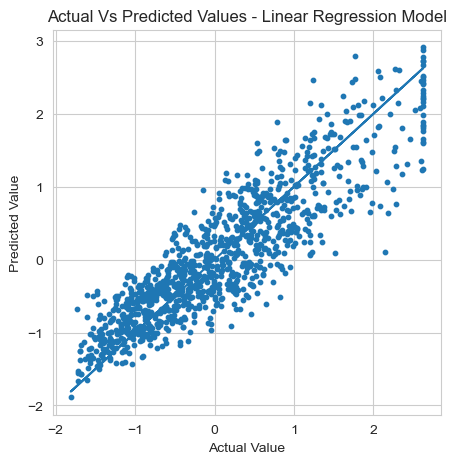

In [161]:
plt.figure(figsize=(5,5))
plt.plot(y_test, y_test)
plt.scatter(y_test, y_pred_test, s=10)
plt.title("Actual Vs Predicted Values - Linear Regression Model")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

### Lasso Model:

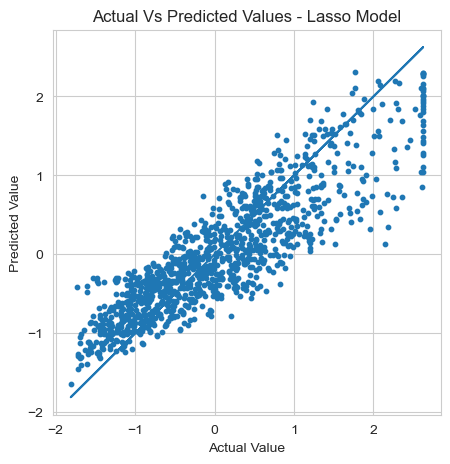

In [162]:
plt.figure(figsize=(5,5))
plt.plot(y_test, y_test)
plt.scatter(y_test, y_test_predict_lasso, s=10)
plt.title("Actual Vs Predicted Values - Lasso Model")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()


### Decision Tree Model:

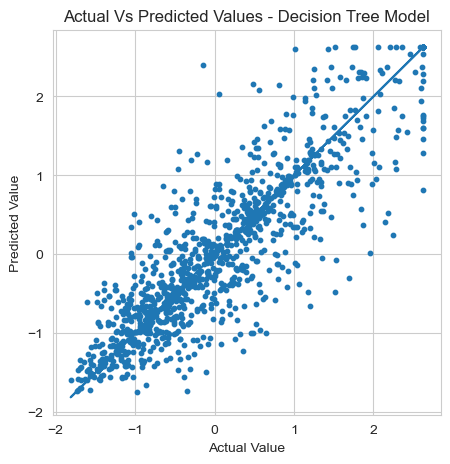

In [163]:
plt.figure(figsize=(5,5))
plt.plot(y_test, y_test)
plt.scatter(y_test, dt_pred_test, s=10)
plt.title("Actual Vs Predicted Values - Decision Tree Model")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()


### Random Forest Model:

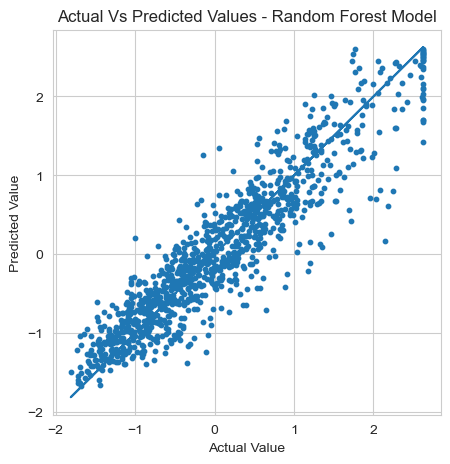

In [164]:
plt.figure(figsize=(5,5))
plt.plot(y_test, y_test)
plt.scatter(y_test, rfr_pred_test, s=10)
plt.title("Actual Vs Predicted Values - Random Forest Model")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()


## Best Model Selection:

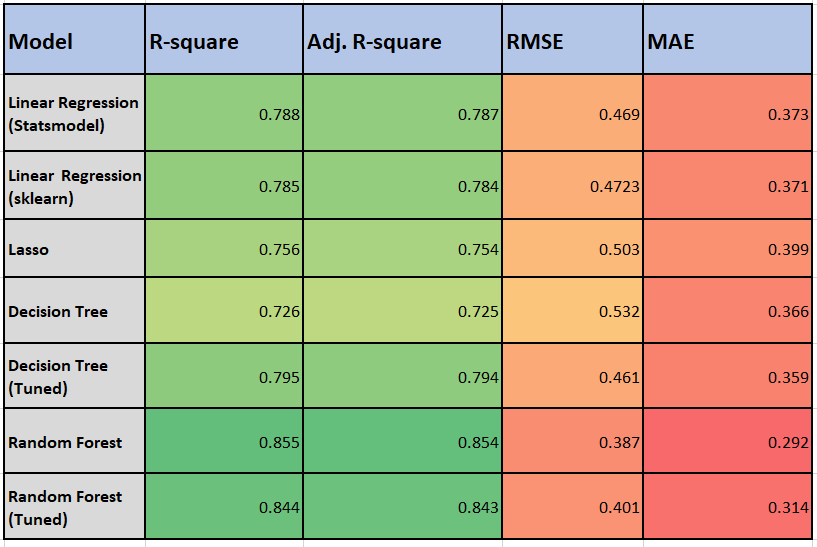

### Based on the analysis, the Random Forest model emerges as the most promising candidate among the evaluated models. It demonstrates a remarkable ability to explain the variance in the test data, accounting for 85% of the variation. Furthermore, it achieves the lowest Root Mean Squared Error (RMSE) of 0.387 and the lowest Mean Absolute Error (MAE) of 0.292, indicating a high degree of accuracy in predicting the target variable.